<a href="https://colab.research.google.com/github/AndreMenta/Natural-Language-Processing/blob/main/LDA_PROVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filtered_dataset = pd.read_csv('/content/drive/MyDrive/PYTHON/Latent Dirichlet Alg/dataset_informatica.csv')
filtered_dataset = filtered_dataset.drop(columns = 'keywords')

In [4]:
#pulizia del campo descrizione
import re

filtered_dataset['text_preprocessed']=filtered_dataset['description'].map(lambda x: re.sub('[,.\!?]', '', x)) #pulire
filtered_dataset['text_preprocessed']=filtered_dataset['text_preprocessed'].map(lambda x: x.lower()) #lowercase
filtered_dataset['text_preprocessed']

0       in this introductory lesson coders create a si...
1       coders storyboard a project based on randomize...
2       coders use a variety of blocks and customized ...
3       coders use a variety of blocks and sprites to ...
4       coders use a variety of blocks and sprites to ...
                              ...                        
1345    this video was recorded at 5th international c...
1346    this video was recorded at 13th acm sigkdd int...
1347    this video was recorded at machine learning su...
1348    this video was recorded at video journal of ma...
1349    this video was recorded at 6th international a...
Name: text_preprocessed, Length: 1350, dtype: object

In [5]:
long_string =','.join(list(filtered_dataset['text_preprocessed'].values))

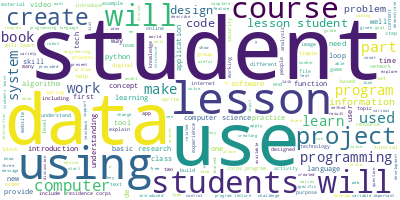

In [6]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [7]:
stop_words = stopwords.words('english')
stop_words.extend(['student','course','use','will', 'students', 'data', 'lesson', 'lessons', 'learn', 'using', 'used'])

def sent_to_words(sentence):
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) #converting the raw text into a list of tokens (words) deacc removes accents
    
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = filtered_dataset['text_preprocessed'][3]
words = list(sent_to_words(data))

words = remove_stopwords(words)
print(words)

[['coders', 'variety', 'blocks', 'sprites', 'create', 'interactive', 'diorama', 'predictions', 'future', 'purpose', 'project', 'apply', 'previously', 'learned', 'concepts', 'new', 'context', 'eg', 'modifying', 'sprites', 'parallelism', 'events', 'etc']]


In [8]:
import gensim.corpora as corpora
from pprint import pprint
from gensim.models import CoherenceModel

def lda(words):
    
    id2word = corpora.Dictionary(words)
    texts = words
    corpus = [id2word.doc2bow(text) for text in texts]
    num_topics = 5
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
    

    return lda_model.print_topics()
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]
    

In [9]:
def coherence(words):
    
    id2word = corpora.Dictionary(words)
    texts = words
    corpus = [id2word.doc2bow(text) for text in texts]
    num_topics = 5
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=words,
                                         dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    return coherence_lda

In [10]:
coherence(words)

0.9999999999999998

**ESTENSIONE A TUTTO IL DATASET**

In [11]:
import re
import tqdm

dataset = pd.read_csv('/content/drive/MyDrive/PYTHON/Latent Dirichlet Alg/dataset_informatica_full.csv')
dataset = dataset.drop(columns = 'keywords')
dataset = dataset[dataset['WikiDescription']!="0"]
dataset = dataset[dataset['WikiDescription']!="-"]
dataset = dataset[dataset['WikiDescription']!='']

dataset['text_preprocessed']=dataset['WikiDescription'].map(lambda x: re.sub('[,.\!?]', '', x))
dataset['text_preprocessed']=dataset['text_preprocessed'].map(lambda x: x.lower())
stop_words = stopwords.words('italian')
dataset['topic'] = 0

dataset[:3]

,Unnamed: 0.1,Unnamed: 0,link,disciplines,title,description,type,Upload_Date,authors,language,...,format,duration,public,min_age,max_age,resource_image,WikiLink,WikiDescription,text_preprocessed,topic
0,809,809,https://www.oercommons.org/courses/intro-to-sc...,Applied Science/Computer Science,Intro to Scratch,"In this lesson, students will begin exploring ...",['Activity/Lab'],2021-03-30 00:00:00,NYC Computer Science for All,English,...,['Audio' 'Text/HTML' 'Video'],60-90,['Upper Primary'],6.0,11.0,https://oercommons.s3.amazonaws.com/media/thum...,https://it.wikipedia.org/wiki/Scratch_(informa...,Scratch è un ambiente di programmazione gratui...,scratch è un ambiente di programmazione gratui...,0
1,810,810,https://www.oercommons.org/courses/intro-to-sc...,Applied Science/Computer Science,Intro to Scratch,Students encounter the Scratch programming pla...,['Activity/Lab'],2021-04-06 00:00:00,NYC Computer Science for All,English,...,['Downloadable docs' 'Text/HTML' 'Video'],60-90,"['Lower Primary', 'Upper Primary']",6.0,11.0,https://oercommons.s3.amazonaws.com/media/thum...,https://it.wikipedia.org/wiki/Scratch_(informa...,"Scratch è adatto a studenti, insegnanti e geni...",scratch è adatto a studenti insegnanti e genit...,0
2,811,811,https://www.oercommons.org/courses/intro-to-ve...,Applied Science/Computer Science,Intro to Vectors Physics and Augmented Reality,Students learn about video motion capture tech...,['Lesson'],2018-08-30 00:00:00,Jackson Reimers,English,...,['Text/HTML'],0-30,['High School'],14.0,18.0,https://oercommons.s3.amazonaws.com/media/thum...,https://it.wikipedia.org/wiki/Realt%C3%A0_aume...,"Per realtà aumentata, o realtà mediata dall'el...",per realtà aumentata o realtà mediata dall'ela...,0


In [12]:
coherences = []
topics = []

In [13]:
#GENERATE TOPICS FOR EACH ROW OF DF

pbar = tqdm.tqdm(total=int(dataset.shape[0]))

def paral_lda(dataset):
    for index, row in dataset.iterrows():
        data = row['text_preprocessed']
        if (data != '' or data != '-') :
            words = list(sent_to_words(data))
            words = remove_stopwords(words)
            topic = lda(words)
            topics.append(topic)
            co_val = coherence(words)
            coherences.append(co_val)
            print(f"{index}/{dataset.shape[0]}")
            pbar.update(1)
    return dataset

#PARALLELIZATION
#dataset = dataset.reset_index()
#import multiprocessing
##num_processes = multiprocessing.cpu_count()
#chunk_size = int(dataset.shape[0]/num_processes)
#chunks = [dataset.iloc[dataset.index[i:i + chunk_size]] for i in range(0, dataset.shape[0], chunk_size)]

#pool = multiprocessing.Pool(processes = num_processes)
#result = pool.map(paral_lda, chunks)
dataset = paral_lda(dataset)
dataset.shape, len(topics)

  0%|          | 1/1066 [00:00<03:21,  5.30it/s]

0/1066


  0%|          | 2/1066 [00:00<04:30,  3.93it/s]

1/1066


  0%|          | 3/1066 [00:00<05:02,  3.51it/s]

2/1066


  0%|          | 4/1066 [00:01<04:31,  3.92it/s]

3/1066


  0%|          | 5/1066 [00:01<04:14,  4.16it/s]

4/1066


  1%|          | 6/1066 [00:01<03:56,  4.49it/s]

5/1066


  1%|          | 7/1066 [00:01<03:54,  4.52it/s]

6/1066


  1%|          | 8/1066 [00:01<03:44,  4.70it/s]

7/1066


  1%|          | 9/1066 [00:02<03:33,  4.96it/s]

8/1066


  1%|          | 10/1066 [00:02<03:36,  4.89it/s]

9/1066


  1%|          | 11/1066 [00:02<03:43,  4.73it/s]

10/1066


  1%|          | 12/1066 [00:02<03:55,  4.48it/s]

11/1066


  1%|          | 13/1066 [00:02<03:42,  4.74it/s]

12/1066
13/1066


  1%|▏         | 15/1066 [00:03<03:41,  4.75it/s]

14/1066


  2%|▏         | 16/1066 [00:03<03:45,  4.65it/s]

15/1066


  2%|▏         | 17/1066 [00:03<03:44,  4.68it/s]

16/1066


  2%|▏         | 18/1066 [00:03<03:59,  4.38it/s]

17/1066


  2%|▏         | 19/1066 [00:04<04:14,  4.12it/s]

18/1066


  2%|▏         | 20/1066 [00:04<04:16,  4.07it/s]

19/1066


  2%|▏         | 21/1066 [00:04<04:23,  3.96it/s]

20/1066


  2%|▏         | 22/1066 [00:05<04:23,  3.97it/s]

21/1066


  2%|▏         | 23/1066 [00:05<04:18,  4.03it/s]

22/1066


  2%|▏         | 24/1066 [00:05<04:21,  3.98it/s]

23/1066


  2%|▏         | 25/1066 [00:05<04:38,  3.74it/s]

24/1066


  2%|▏         | 26/1066 [00:06<04:47,  3.62it/s]

25/1066


  3%|▎         | 27/1066 [00:06<04:49,  3.59it/s]

26/1066


  3%|▎         | 28/1066 [00:06<04:46,  3.62it/s]

27/1066


  3%|▎         | 29/1066 [00:07<05:24,  3.20it/s]

28/1066


  3%|▎         | 30/1066 [00:07<05:07,  3.37it/s]

29/1066


  3%|▎         | 31/1066 [00:07<05:04,  3.40it/s]

30/1066


  3%|▎         | 32/1066 [00:07<04:57,  3.48it/s]

31/1066


  3%|▎         | 33/1066 [00:08<05:42,  3.02it/s]

32/1066


  3%|▎         | 34/1066 [00:08<06:51,  2.51it/s]

33/1066


  3%|▎         | 35/1066 [00:09<07:12,  2.38it/s]

34/1066


  3%|▎         | 36/1066 [00:09<07:26,  2.31it/s]

35/1066


  3%|▎         | 37/1066 [00:10<07:02,  2.44it/s]

36/1066


  4%|▎         | 38/1066 [00:10<06:18,  2.71it/s]

37/1066


  4%|▎         | 39/1066 [00:10<06:20,  2.70it/s]

38/1066


  4%|▍         | 40/1066 [00:11<06:28,  2.64it/s]

39/1066


  4%|▍         | 41/1066 [00:11<06:35,  2.59it/s]

40/1066


  4%|▍         | 42/1066 [00:11<06:23,  2.67it/s]

41/1066


  4%|▍         | 43/1066 [00:12<06:14,  2.73it/s]

42/1066


  4%|▍         | 44/1066 [00:12<06:10,  2.76it/s]

43/1066


  4%|▍         | 45/1066 [00:12<05:35,  3.05it/s]

44/1066


  4%|▍         | 46/1066 [00:13<05:03,  3.36it/s]

45/1066


  4%|▍         | 47/1066 [00:13<04:29,  3.78it/s]

46/1066


  5%|▍         | 48/1066 [00:13<04:41,  3.61it/s]

47/1066


  5%|▍         | 49/1066 [00:13<04:31,  3.75it/s]

48/1066


  5%|▍         | 50/1066 [00:14<04:48,  3.52it/s]

49/1066


  5%|▍         | 51/1066 [00:14<04:51,  3.48it/s]

50/1066


  5%|▍         | 52/1066 [00:15<07:11,  2.35it/s]

51/1066


  5%|▍         | 53/1066 [00:15<06:36,  2.55it/s]

52/1066


  5%|▌         | 54/1066 [00:16<07:32,  2.24it/s]

53/1066


  5%|▌         | 55/1066 [00:16<06:55,  2.43it/s]

54/1066


  5%|▌         | 56/1066 [00:16<06:07,  2.75it/s]

55/1066


  5%|▌         | 57/1066 [00:16<05:22,  3.13it/s]

56/1066


  5%|▌         | 58/1066 [00:17<05:04,  3.31it/s]

57/1066


  6%|▌         | 59/1066 [00:17<04:45,  3.52it/s]

58/1066


  6%|▌         | 60/1066 [00:17<04:24,  3.81it/s]

59/1066


  6%|▌         | 61/1066 [00:17<04:33,  3.68it/s]

60/1066


  6%|▌         | 62/1066 [00:18<04:22,  3.82it/s]

61/1066


  6%|▌         | 63/1066 [00:18<04:34,  3.66it/s]

62/1066


  6%|▌         | 64/1066 [00:18<04:39,  3.59it/s]

63/1066


  6%|▌         | 65/1066 [00:19<04:44,  3.51it/s]

64/1066


  6%|▌         | 66/1066 [00:19<04:37,  3.60it/s]

65/1066


  6%|▋         | 67/1066 [00:19<04:40,  3.56it/s]

66/1066


  6%|▋         | 68/1066 [00:19<04:36,  3.61it/s]

67/1066


  6%|▋         | 69/1066 [00:20<04:36,  3.61it/s]

68/1066


  7%|▋         | 70/1066 [00:20<04:44,  3.50it/s]

69/1066


  7%|▋         | 71/1066 [00:20<04:45,  3.49it/s]

70/1066


  7%|▋         | 72/1066 [00:21<04:41,  3.53it/s]

71/1066


  7%|▋         | 73/1066 [00:21<05:05,  3.25it/s]

72/1066


  7%|▋         | 74/1066 [00:21<05:33,  2.98it/s]

73/1066


  7%|▋         | 75/1066 [00:22<05:37,  2.93it/s]

74/1066


  7%|▋         | 76/1066 [00:22<05:17,  3.12it/s]

75/1066


  7%|▋         | 77/1066 [00:22<05:38,  2.92it/s]

76/1066


  7%|▋         | 78/1066 [00:23<05:30,  2.99it/s]

77/1066


  7%|▋         | 79/1066 [00:23<05:47,  2.84it/s]

78/1066


  8%|▊         | 80/1066 [00:23<05:45,  2.85it/s]

79/1066


  8%|▊         | 81/1066 [00:24<05:22,  3.06it/s]

80/1066


  8%|▊         | 82/1066 [00:24<05:47,  2.83it/s]

81/1066


  8%|▊         | 83/1066 [00:24<05:40,  2.89it/s]

82/1066


  8%|▊         | 84/1066 [00:25<05:23,  3.03it/s]

83/1066


  8%|▊         | 85/1066 [00:25<05:02,  3.24it/s]

84/1066


  8%|▊         | 86/1066 [00:25<04:31,  3.61it/s]

85/1066


  8%|▊         | 87/1066 [00:25<04:23,  3.71it/s]

86/1066


  8%|▊         | 88/1066 [00:26<04:08,  3.93it/s]

87/1066


  8%|▊         | 89/1066 [00:26<04:11,  3.88it/s]

88/1066


  8%|▊         | 90/1066 [00:26<04:02,  4.02it/s]

89/1066


  9%|▊         | 91/1066 [00:26<04:13,  3.84it/s]

90/1066


  9%|▊         | 92/1066 [00:27<04:31,  3.59it/s]

91/1066


  9%|▊         | 93/1066 [00:27<04:17,  3.77it/s]

92/1066


  9%|▉         | 94/1066 [00:27<04:14,  3.82it/s]

93/1066


  9%|▉         | 95/1066 [00:27<04:09,  3.89it/s]

94/1066


  9%|▉         | 96/1066 [00:28<04:10,  3.88it/s]

95/1066


  9%|▉         | 97/1066 [00:28<04:01,  4.01it/s]

96/1066


  9%|▉         | 98/1066 [00:28<03:51,  4.18it/s]

97/1066


  9%|▉         | 99/1066 [00:28<03:35,  4.48it/s]

98/1066


  9%|▉         | 100/1066 [00:29<03:28,  4.63it/s]

99/1066


  9%|▉         | 101/1066 [00:29<03:15,  4.93it/s]

100/1066


 10%|▉         | 102/1066 [00:29<03:08,  5.12it/s]

101/1066


 10%|▉         | 103/1066 [00:29<03:44,  4.28it/s]

102/1066


 10%|▉         | 104/1066 [00:29<03:25,  4.69it/s]

103/1066


 10%|▉         | 105/1066 [00:30<03:14,  4.94it/s]

104/1066


 10%|▉         | 106/1066 [00:30<03:10,  5.03it/s]

105/1066


 10%|█         | 107/1066 [00:30<03:46,  4.23it/s]

106/1066


 10%|█         | 108/1066 [00:30<03:32,  4.51it/s]

107/1066


 10%|█         | 109/1066 [00:30<03:18,  4.82it/s]

108/1066


 10%|█         | 110/1066 [00:31<03:56,  4.04it/s]

109/1066


 10%|█         | 111/1066 [00:31<04:17,  3.70it/s]

110/1066


 11%|█         | 112/1066 [00:31<03:59,  3.99it/s]

111/1066


 11%|█         | 113/1066 [00:32<04:16,  3.72it/s]

112/1066


 11%|█         | 114/1066 [00:32<04:09,  3.82it/s]

113/1066


 11%|█         | 115/1066 [00:32<04:19,  3.66it/s]

114/1066


 11%|█         | 116/1066 [00:32<04:15,  3.71it/s]

115/1066


 11%|█         | 117/1066 [00:33<03:58,  3.98it/s]

116/1066


 11%|█         | 118/1066 [00:33<03:55,  4.02it/s]

117/1066


 11%|█         | 119/1066 [00:33<03:38,  4.34it/s]

118/1066


 11%|█▏        | 120/1066 [00:33<03:56,  4.01it/s]

119/1066


 11%|█▏        | 121/1066 [00:34<03:59,  3.95it/s]

120/1066


 11%|█▏        | 122/1066 [00:34<04:08,  3.80it/s]

121/1066


 12%|█▏        | 123/1066 [00:34<04:13,  3.72it/s]

122/1066


 12%|█▏        | 124/1066 [00:34<04:18,  3.64it/s]

123/1066


 12%|█▏        | 125/1066 [00:35<04:14,  3.70it/s]

124/1066


 12%|█▏        | 126/1066 [00:35<04:27,  3.51it/s]

125/1066


 12%|█▏        | 127/1066 [00:35<04:21,  3.58it/s]

126/1066


 12%|█▏        | 128/1066 [00:36<04:38,  3.37it/s]

127/1066


 12%|█▏        | 129/1066 [00:36<05:00,  3.12it/s]

128/1066


 12%|█▏        | 130/1066 [00:36<05:17,  2.95it/s]

129/1066


 12%|█▏        | 131/1066 [00:37<04:49,  3.23it/s]

130/1066


 12%|█▏        | 132/1066 [00:37<04:39,  3.34it/s]

131/1066


 12%|█▏        | 133/1066 [00:37<05:02,  3.09it/s]

132/1066


 13%|█▎        | 134/1066 [00:38<04:49,  3.22it/s]

133/1066


 13%|█▎        | 135/1066 [00:38<04:24,  3.52it/s]

134/1066


 13%|█▎        | 136/1066 [00:38<05:02,  3.07it/s]

135/1066


 13%|█▎        | 137/1066 [00:39<04:45,  3.25it/s]

136/1066


 13%|█▎        | 138/1066 [00:39<05:06,  3.03it/s]

137/1066


 13%|█▎        | 139/1066 [00:39<04:48,  3.21it/s]

138/1066


 13%|█▎        | 140/1066 [00:39<04:37,  3.34it/s]

139/1066


 13%|█▎        | 141/1066 [00:40<04:00,  3.85it/s]

140/1066


 13%|█▎        | 142/1066 [00:40<04:00,  3.84it/s]

141/1066


 13%|█▎        | 143/1066 [00:40<04:11,  3.66it/s]

142/1066


 14%|█▎        | 144/1066 [00:40<04:12,  3.65it/s]

143/1066


 14%|█▎        | 145/1066 [00:41<04:17,  3.57it/s]

144/1066


 14%|█▎        | 146/1066 [00:41<03:48,  4.02it/s]

145/1066


 14%|█▍        | 147/1066 [00:41<03:47,  4.04it/s]

146/1066


 14%|█▍        | 148/1066 [00:41<03:46,  4.06it/s]

147/1066


 14%|█▍        | 149/1066 [00:42<03:35,  4.25it/s]

148/1066


 14%|█▍        | 150/1066 [00:42<03:36,  4.22it/s]

149/1066


 14%|█▍        | 151/1066 [00:42<03:49,  3.99it/s]

150/1066


 14%|█▍        | 152/1066 [00:42<04:06,  3.70it/s]

151/1066


 14%|█▍        | 153/1066 [00:43<03:50,  3.96it/s]

152/1066


 14%|█▍        | 154/1066 [00:43<03:31,  4.31it/s]

153/1066


 15%|█▍        | 155/1066 [00:43<03:27,  4.39it/s]

154/1066


 15%|█▍        | 156/1066 [00:43<03:28,  4.36it/s]

155/1066


 15%|█▍        | 157/1066 [00:44<03:23,  4.47it/s]

156/1066


 15%|█▍        | 158/1066 [00:44<03:13,  4.70it/s]

157/1066


 15%|█▍        | 159/1066 [00:44<03:15,  4.63it/s]

158/1066


 15%|█▌        | 160/1066 [00:44<03:40,  4.12it/s]

159/1066


 15%|█▌        | 161/1066 [00:45<04:28,  3.37it/s]

160/1066


 15%|█▌        | 162/1066 [00:45<04:01,  3.75it/s]

161/1066


 15%|█▌        | 163/1066 [00:45<03:36,  4.17it/s]

162/1066


 15%|█▌        | 164/1066 [00:45<04:37,  3.25it/s]

163/1066


 15%|█▌        | 165/1066 [00:46<04:07,  3.64it/s]

164/1066


 16%|█▌        | 166/1066 [00:46<04:17,  3.50it/s]

165/1066


 16%|█▌        | 167/1066 [00:46<04:22,  3.42it/s]

166/1066


 16%|█▌        | 168/1066 [00:47<04:29,  3.34it/s]

167/1066


 16%|█▌        | 169/1066 [00:47<04:37,  3.23it/s]

168/1066


 16%|█▌        | 170/1066 [00:47<03:56,  3.79it/s]

169/1066


 16%|█▌        | 171/1066 [00:47<03:31,  4.24it/s]

170/1066


 16%|█▌        | 172/1066 [00:48<03:28,  4.29it/s]

171/1066


 16%|█▌        | 173/1066 [00:48<03:28,  4.29it/s]

172/1066


 16%|█▋        | 174/1066 [00:48<03:25,  4.34it/s]

173/1066


 16%|█▋        | 175/1066 [00:48<03:17,  4.51it/s]

174/1066


 17%|█▋        | 176/1066 [00:48<02:57,  5.01it/s]

175/1066


 17%|█▋        | 177/1066 [00:48<02:51,  5.18it/s]

176/1066


 17%|█▋        | 178/1066 [00:49<03:02,  4.87it/s]

177/1066


 17%|█▋        | 179/1066 [00:49<04:05,  3.62it/s]

178/1066


 17%|█▋        | 180/1066 [00:50<04:50,  3.05it/s]

179/1066


 17%|█▋        | 181/1066 [00:50<05:25,  2.72it/s]

180/1066


 17%|█▋        | 182/1066 [00:51<05:46,  2.55it/s]

181/1066


 17%|█▋        | 183/1066 [00:51<06:10,  2.38it/s]

182/1066


 17%|█▋        | 184/1066 [00:52<06:28,  2.27it/s]

183/1066


 17%|█▋        | 185/1066 [00:52<06:27,  2.27it/s]

184/1066


 17%|█▋        | 186/1066 [00:52<06:32,  2.24it/s]

185/1066


 18%|█▊        | 187/1066 [00:53<06:45,  2.17it/s]

186/1066


 18%|█▊        | 188/1066 [00:53<06:33,  2.23it/s]

187/1066


 18%|█▊        | 189/1066 [00:54<06:03,  2.42it/s]

188/1066


 18%|█▊        | 190/1066 [00:54<05:22,  2.71it/s]

189/1066


 18%|█▊        | 191/1066 [00:54<04:31,  3.22it/s]

190/1066


 18%|█▊        | 192/1066 [00:54<04:07,  3.53it/s]

191/1066


 18%|█▊        | 193/1066 [00:54<03:42,  3.92it/s]

192/1066


 18%|█▊        | 194/1066 [00:55<03:24,  4.27it/s]

193/1066


 18%|█▊        | 195/1066 [00:55<03:12,  4.53it/s]

194/1066


 18%|█▊        | 196/1066 [00:55<03:26,  4.20it/s]

195/1066


 18%|█▊        | 197/1066 [00:55<03:27,  4.19it/s]

196/1066


 19%|█▊        | 198/1066 [00:56<03:14,  4.45it/s]

197/1066


 19%|█▊        | 199/1066 [00:56<03:18,  4.36it/s]

198/1066


 19%|█▉        | 200/1066 [00:56<03:14,  4.45it/s]

199/1066


 19%|█▉        | 201/1066 [00:56<03:12,  4.48it/s]

200/1066


 19%|█▉        | 202/1066 [00:57<03:20,  4.31it/s]

201/1066


 19%|█▉        | 203/1066 [00:57<03:36,  3.98it/s]

202/1066


 19%|█▉        | 204/1066 [00:57<03:41,  3.89it/s]

203/1066


 19%|█▉        | 205/1066 [00:57<03:39,  3.93it/s]

204/1066


 19%|█▉        | 206/1066 [00:58<03:53,  3.68it/s]

205/1066


 19%|█▉        | 207/1066 [00:58<03:56,  3.63it/s]

206/1066


 20%|█▉        | 208/1066 [00:58<03:30,  4.08it/s]

207/1066


 20%|█▉        | 209/1066 [00:58<03:47,  3.76it/s]

208/1066


 20%|█▉        | 210/1066 [00:59<03:47,  3.76it/s]

209/1066


 20%|█▉        | 211/1066 [00:59<04:06,  3.47it/s]

210/1066


 20%|█▉        | 212/1066 [00:59<04:17,  3.31it/s]

211/1066


 20%|█▉        | 213/1066 [01:00<04:23,  3.23it/s]

212/1066


 20%|██        | 214/1066 [01:00<04:16,  3.33it/s]

213/1066


 20%|██        | 215/1066 [01:00<03:48,  3.72it/s]

214/1066


 20%|██        | 216/1066 [01:00<03:24,  4.16it/s]

215/1066


 20%|██        | 217/1066 [01:01<03:35,  3.95it/s]

216/1066


 20%|██        | 218/1066 [01:01<04:16,  3.30it/s]

217/1066


 21%|██        | 219/1066 [01:01<04:29,  3.15it/s]

218/1066


 21%|██        | 220/1066 [01:02<04:42,  3.00it/s]

219/1066


 21%|██        | 221/1066 [01:02<04:49,  2.92it/s]

220/1066


 21%|██        | 222/1066 [01:02<04:58,  2.83it/s]

221/1066


 21%|██        | 223/1066 [01:03<04:56,  2.85it/s]

222/1066


 21%|██        | 224/1066 [01:03<04:36,  3.05it/s]

223/1066


 21%|██        | 225/1066 [01:03<04:42,  2.97it/s]

224/1066


 21%|██        | 226/1066 [01:04<04:54,  2.86it/s]

225/1066


 21%|██▏       | 227/1066 [01:04<04:24,  3.17it/s]

226/1066


 21%|██▏       | 228/1066 [01:04<04:02,  3.46it/s]

227/1066


 21%|██▏       | 229/1066 [01:05<03:50,  3.63it/s]

228/1066


 22%|██▏       | 230/1066 [01:05<04:15,  3.27it/s]

229/1066


 22%|██▏       | 231/1066 [01:05<04:17,  3.25it/s]

230/1066


 22%|██▏       | 232/1066 [01:06<04:23,  3.17it/s]

231/1066


 22%|██▏       | 233/1066 [01:06<04:36,  3.01it/s]

232/1066


 22%|██▏       | 234/1066 [01:06<04:38,  2.99it/s]

233/1066


 22%|██▏       | 235/1066 [01:07<04:41,  2.95it/s]

234/1066


 22%|██▏       | 236/1066 [01:07<05:06,  2.71it/s]

235/1066


 22%|██▏       | 237/1066 [01:07<04:29,  3.08it/s]

236/1066


 22%|██▏       | 238/1066 [01:08<04:37,  2.99it/s]

237/1066


 22%|██▏       | 239/1066 [01:08<04:28,  3.08it/s]

238/1066


 23%|██▎       | 240/1066 [01:08<03:48,  3.62it/s]

239/1066


 23%|██▎       | 241/1066 [01:08<03:35,  3.82it/s]

240/1066


 23%|██▎       | 242/1066 [01:09<03:35,  3.83it/s]

241/1066


 23%|██▎       | 243/1066 [01:09<03:23,  4.04it/s]

242/1066


 23%|██▎       | 244/1066 [01:09<03:41,  3.72it/s]

243/1066


 23%|██▎       | 245/1066 [01:09<03:26,  3.98it/s]

244/1066


 23%|██▎       | 246/1066 [01:10<03:16,  4.17it/s]

245/1066


 23%|██▎       | 247/1066 [01:10<03:16,  4.16it/s]

246/1066


 23%|██▎       | 248/1066 [01:10<03:27,  3.93it/s]

247/1066


 23%|██▎       | 249/1066 [01:10<03:16,  4.15it/s]

248/1066


 23%|██▎       | 250/1066 [01:11<03:40,  3.70it/s]

249/1066


 24%|██▎       | 251/1066 [01:11<03:51,  3.52it/s]

250/1066


 24%|██▎       | 252/1066 [01:11<04:14,  3.20it/s]

251/1066


 24%|██▎       | 253/1066 [01:12<04:37,  2.93it/s]

252/1066


 24%|██▍       | 254/1066 [01:12<04:07,  3.28it/s]

253/1066


 24%|██▍       | 255/1066 [01:12<04:11,  3.23it/s]

254/1066


 24%|██▍       | 256/1066 [01:13<04:06,  3.29it/s]

255/1066


 24%|██▍       | 257/1066 [01:13<04:29,  3.00it/s]

256/1066


 24%|██▍       | 258/1066 [01:13<04:13,  3.18it/s]

257/1066


 24%|██▍       | 259/1066 [01:14<04:29,  3.00it/s]

258/1066


 24%|██▍       | 260/1066 [01:14<04:40,  2.88it/s]

259/1066


 24%|██▍       | 261/1066 [01:14<04:52,  2.75it/s]

260/1066


 25%|██▍       | 262/1066 [01:15<04:48,  2.78it/s]

261/1066


 25%|██▍       | 263/1066 [01:15<04:50,  2.76it/s]

262/1066


 25%|██▍       | 264/1066 [01:16<05:01,  2.66it/s]

263/1066


 25%|██▍       | 265/1066 [01:16<05:04,  2.63it/s]

264/1066


 25%|██▍       | 266/1066 [01:16<04:58,  2.68it/s]

265/1066


 25%|██▌       | 267/1066 [01:17<04:30,  2.96it/s]

266/1066


 25%|██▌       | 268/1066 [01:17<04:16,  3.11it/s]

267/1066


 25%|██▌       | 269/1066 [01:17<04:10,  3.18it/s]

268/1066


 25%|██▌       | 270/1066 [01:17<04:12,  3.15it/s]

269/1066


 25%|██▌       | 271/1066 [01:18<04:30,  2.94it/s]

270/1066


 26%|██▌       | 272/1066 [01:18<04:57,  2.67it/s]

271/1066


 26%|██▌       | 273/1066 [01:19<05:25,  2.43it/s]

272/1066


 26%|██▌       | 274/1066 [01:19<06:06,  2.16it/s]

273/1066


 26%|██▌       | 275/1066 [01:20<06:02,  2.18it/s]

274/1066


 26%|██▌       | 276/1066 [01:20<05:50,  2.25it/s]

275/1066


 26%|██▌       | 277/1066 [01:21<05:44,  2.29it/s]

276/1066


 26%|██▌       | 278/1066 [01:21<06:11,  2.12it/s]

277/1066


 26%|██▌       | 279/1066 [01:22<06:32,  2.00it/s]

278/1066


 26%|██▋       | 280/1066 [01:22<06:14,  2.10it/s]

279/1066


 26%|██▋       | 281/1066 [01:23<05:52,  2.23it/s]

280/1066


 26%|██▋       | 282/1066 [01:23<05:35,  2.34it/s]

281/1066


 27%|██▋       | 283/1066 [01:23<05:21,  2.43it/s]

282/1066


 27%|██▋       | 284/1066 [01:24<04:50,  2.69it/s]

283/1066


 27%|██▋       | 285/1066 [01:24<04:27,  2.92it/s]

284/1066


 27%|██▋       | 286/1066 [01:24<04:32,  2.86it/s]

285/1066


 27%|██▋       | 287/1066 [01:25<04:10,  3.11it/s]

286/1066


 27%|██▋       | 288/1066 [01:25<04:08,  3.13it/s]

287/1066


 27%|██▋       | 289/1066 [01:25<04:16,  3.03it/s]

288/1066


 27%|██▋       | 290/1066 [01:26<04:29,  2.88it/s]

289/1066


 27%|██▋       | 291/1066 [01:26<04:26,  2.90it/s]

290/1066


 27%|██▋       | 292/1066 [01:26<04:45,  2.71it/s]

291/1066


 27%|██▋       | 293/1066 [01:27<04:38,  2.78it/s]

292/1066


 28%|██▊       | 294/1066 [01:27<04:26,  2.89it/s]

293/1066


 28%|██▊       | 295/1066 [01:27<04:45,  2.70it/s]

294/1066


 28%|██▊       | 296/1066 [01:28<04:59,  2.57it/s]

295/1066


 28%|██▊       | 297/1066 [01:28<04:54,  2.62it/s]

296/1066


 28%|██▊       | 298/1066 [01:29<05:03,  2.53it/s]

297/1066


 28%|██▊       | 299/1066 [01:29<05:07,  2.50it/s]

298/1066


 28%|██▊       | 300/1066 [01:29<05:15,  2.43it/s]

299/1066


 28%|██▊       | 301/1066 [01:30<05:02,  2.52it/s]

300/1066


 28%|██▊       | 302/1066 [01:30<04:40,  2.73it/s]

301/1066


 28%|██▊       | 303/1066 [01:31<04:48,  2.65it/s]

302/1066


 29%|██▊       | 304/1066 [01:31<04:38,  2.73it/s]

303/1066


 29%|██▊       | 305/1066 [01:31<04:51,  2.61it/s]

304/1066


 29%|██▊       | 306/1066 [01:32<04:56,  2.56it/s]

305/1066


 29%|██▉       | 307/1066 [01:32<05:29,  2.31it/s]

306/1066


 29%|██▉       | 308/1066 [01:33<05:35,  2.26it/s]

307/1066


 29%|██▉       | 309/1066 [01:33<05:46,  2.19it/s]

308/1066


 29%|██▉       | 310/1066 [01:34<06:04,  2.08it/s]

309/1066


 29%|██▉       | 311/1066 [01:34<06:17,  2.00it/s]

310/1066


 29%|██▉       | 312/1066 [01:35<06:33,  1.92it/s]

311/1066


 29%|██▉       | 313/1066 [01:35<06:28,  1.94it/s]

312/1066


 29%|██▉       | 314/1066 [01:36<06:33,  1.91it/s]

313/1066


 30%|██▉       | 315/1066 [01:36<06:12,  2.02it/s]

314/1066


 30%|██▉       | 316/1066 [01:37<05:24,  2.31it/s]

315/1066


 30%|██▉       | 317/1066 [01:37<04:46,  2.62it/s]

316/1066


 30%|██▉       | 318/1066 [01:37<04:20,  2.87it/s]

317/1066


 30%|██▉       | 319/1066 [01:37<04:10,  2.98it/s]

318/1066


 30%|███       | 320/1066 [01:38<04:19,  2.87it/s]

319/1066


 30%|███       | 321/1066 [01:38<04:42,  2.64it/s]

320/1066


 30%|███       | 322/1066 [01:39<04:45,  2.60it/s]

321/1066


 30%|███       | 323/1066 [01:39<04:37,  2.68it/s]

322/1066


 30%|███       | 324/1066 [01:39<04:52,  2.54it/s]

323/1066


 30%|███       | 325/1066 [01:40<04:19,  2.85it/s]

324/1066


 31%|███       | 326/1066 [01:40<03:48,  3.24it/s]

325/1066


 31%|███       | 327/1066 [01:40<04:24,  2.80it/s]

326/1066


 31%|███       | 328/1066 [01:41<04:20,  2.83it/s]

327/1066


 31%|███       | 329/1066 [01:41<04:28,  2.75it/s]

328/1066


 31%|███       | 330/1066 [01:41<04:10,  2.94it/s]

329/1066


 31%|███       | 331/1066 [01:42<04:08,  2.95it/s]

330/1066


 31%|███       | 332/1066 [01:42<03:34,  3.42it/s]

331/1066


 31%|███       | 333/1066 [01:42<03:43,  3.28it/s]

332/1066


 31%|███▏      | 334/1066 [01:43<04:02,  3.02it/s]

333/1066


 31%|███▏      | 335/1066 [01:43<04:31,  2.69it/s]

334/1066


 32%|███▏      | 336/1066 [01:44<04:38,  2.62it/s]

335/1066


 32%|███▏      | 337/1066 [01:44<04:43,  2.57it/s]

336/1066


 32%|███▏      | 338/1066 [01:44<04:56,  2.46it/s]

337/1066


 32%|███▏      | 339/1066 [01:45<04:50,  2.50it/s]

338/1066


 32%|███▏      | 340/1066 [01:45<04:42,  2.57it/s]

339/1066


 32%|███▏      | 341/1066 [01:46<04:37,  2.61it/s]

340/1066


 32%|███▏      | 342/1066 [01:46<04:37,  2.61it/s]

341/1066


 32%|███▏      | 343/1066 [01:46<05:12,  2.31it/s]

342/1066


 32%|███▏      | 344/1066 [01:47<05:29,  2.19it/s]

343/1066


 32%|███▏      | 345/1066 [01:47<05:09,  2.33it/s]

344/1066


 32%|███▏      | 346/1066 [01:48<05:34,  2.16it/s]

345/1066


 33%|███▎      | 347/1066 [01:48<05:36,  2.14it/s]

346/1066


 33%|███▎      | 348/1066 [01:49<05:45,  2.08it/s]

347/1066


 33%|███▎      | 349/1066 [01:49<06:02,  1.98it/s]

348/1066


 33%|███▎      | 350/1066 [01:50<05:42,  2.09it/s]

349/1066


 33%|███▎      | 351/1066 [01:50<05:59,  1.99it/s]

350/1066


 33%|███▎      | 352/1066 [01:51<05:35,  2.13it/s]

351/1066


 33%|███▎      | 353/1066 [01:51<05:23,  2.21it/s]

352/1066


 33%|███▎      | 354/1066 [01:52<05:24,  2.19it/s]

353/1066


 33%|███▎      | 355/1066 [01:52<05:02,  2.35it/s]

354/1066


 33%|███▎      | 356/1066 [01:52<04:56,  2.39it/s]

355/1066


 33%|███▎      | 357/1066 [01:53<04:46,  2.47it/s]

356/1066


 34%|███▎      | 358/1066 [01:53<04:50,  2.44it/s]

357/1066


 34%|███▎      | 359/1066 [01:54<04:42,  2.50it/s]

358/1066


 34%|███▍      | 360/1066 [01:54<04:36,  2.56it/s]

359/1066


 34%|███▍      | 361/1066 [01:54<04:30,  2.61it/s]

360/1066


 34%|███▍      | 362/1066 [01:55<04:43,  2.48it/s]

361/1066


 34%|███▍      | 363/1066 [01:55<04:42,  2.49it/s]

362/1066


 34%|███▍      | 364/1066 [01:56<04:38,  2.52it/s]

363/1066


 34%|███▍      | 365/1066 [01:56<04:30,  2.59it/s]

364/1066


 34%|███▍      | 366/1066 [01:56<04:00,  2.91it/s]

365/1066


 34%|███▍      | 367/1066 [01:56<03:26,  3.38it/s]

366/1066


 35%|███▍      | 368/1066 [01:57<03:44,  3.11it/s]

367/1066


 35%|███▍      | 369/1066 [01:57<04:03,  2.86it/s]

368/1066


 35%|███▍      | 370/1066 [01:57<04:02,  2.87it/s]

369/1066


 35%|███▍      | 371/1066 [01:58<04:02,  2.86it/s]

370/1066


 35%|███▍      | 372/1066 [01:58<04:09,  2.78it/s]

371/1066


 35%|███▍      | 373/1066 [01:59<04:11,  2.76it/s]

372/1066


 35%|███▌      | 374/1066 [01:59<03:34,  3.22it/s]

373/1066


 35%|███▌      | 375/1066 [01:59<03:10,  3.62it/s]

374/1066


 35%|███▌      | 376/1066 [01:59<03:45,  3.06it/s]

375/1066


 35%|███▌      | 377/1066 [02:00<03:46,  3.04it/s]

376/1066


 35%|███▌      | 378/1066 [02:00<04:04,  2.82it/s]

377/1066


 36%|███▌      | 379/1066 [02:01<04:17,  2.67it/s]

378/1066


 36%|███▌      | 380/1066 [02:01<04:34,  2.50it/s]

379/1066


 36%|███▌      | 381/1066 [02:02<05:03,  2.26it/s]

380/1066


 36%|███▌      | 382/1066 [02:02<05:11,  2.20it/s]

381/1066


 36%|███▌      | 383/1066 [02:03<05:26,  2.09it/s]

382/1066


 36%|███▌      | 384/1066 [02:03<05:23,  2.11it/s]

383/1066


 36%|███▌      | 385/1066 [02:04<05:26,  2.08it/s]

384/1066


 36%|███▌      | 386/1066 [02:04<05:20,  2.12it/s]

385/1066


 36%|███▋      | 387/1066 [02:05<05:28,  2.07it/s]

386/1066


 36%|███▋      | 388/1066 [02:05<05:10,  2.18it/s]

387/1066


 36%|███▋      | 389/1066 [02:05<04:57,  2.28it/s]

388/1066


 37%|███▋      | 390/1066 [02:06<04:35,  2.46it/s]

389/1066


 37%|███▋      | 391/1066 [02:06<04:47,  2.35it/s]

390/1066


 37%|███▋      | 392/1066 [02:07<04:36,  2.44it/s]

391/1066


 37%|███▋      | 393/1066 [02:07<04:35,  2.45it/s]

392/1066


 37%|███▋      | 394/1066 [02:07<04:33,  2.46it/s]

393/1066


 37%|███▋      | 395/1066 [02:08<04:28,  2.50it/s]

394/1066


 37%|███▋      | 396/1066 [02:08<04:21,  2.56it/s]

395/1066


 37%|███▋      | 397/1066 [02:08<04:18,  2.59it/s]

396/1066


 37%|███▋      | 398/1066 [02:09<04:06,  2.71it/s]

397/1066


 37%|███▋      | 399/1066 [02:09<03:51,  2.88it/s]

398/1066


 38%|███▊      | 400/1066 [02:10<04:09,  2.67it/s]

399/1066


 38%|███▊      | 401/1066 [02:10<04:25,  2.51it/s]

400/1066


 38%|███▊      | 402/1066 [02:10<04:15,  2.60it/s]

401/1066


 38%|███▊      | 403/1066 [02:11<04:28,  2.47it/s]

402/1066


 38%|███▊      | 404/1066 [02:11<04:16,  2.58it/s]

403/1066


 38%|███▊      | 405/1066 [02:11<04:07,  2.67it/s]

404/1066


 38%|███▊      | 406/1066 [02:12<04:10,  2.63it/s]

405/1066


 38%|███▊      | 407/1066 [02:12<04:13,  2.60it/s]

406/1066


 38%|███▊      | 408/1066 [02:13<04:35,  2.39it/s]

407/1066


 38%|███▊      | 409/1066 [02:13<04:32,  2.41it/s]

408/1066


 38%|███▊      | 410/1066 [02:14<05:02,  2.17it/s]

409/1066


 39%|███▊      | 411/1066 [02:14<04:32,  2.40it/s]

410/1066


 39%|███▊      | 412/1066 [02:14<04:28,  2.44it/s]

411/1066


 39%|███▊      | 413/1066 [02:15<04:30,  2.42it/s]

412/1066


 39%|███▉      | 414/1066 [02:15<05:03,  2.15it/s]

413/1066


 39%|███▉      | 415/1066 [02:16<05:26,  2.00it/s]

414/1066


 39%|███▉      | 416/1066 [02:17<05:39,  1.92it/s]

415/1066


 39%|███▉      | 417/1066 [02:17<05:45,  1.88it/s]

416/1066


 39%|███▉      | 418/1066 [02:18<06:04,  1.78it/s]

417/1066


 39%|███▉      | 419/1066 [02:18<06:30,  1.66it/s]

418/1066


 39%|███▉      | 420/1066 [02:19<05:58,  1.80it/s]

419/1066


 39%|███▉      | 421/1066 [02:20<06:32,  1.64it/s]

420/1066


 40%|███▉      | 422/1066 [02:20<07:06,  1.51it/s]

421/1066


 40%|███▉      | 423/1066 [02:21<07:29,  1.43it/s]

422/1066


 40%|███▉      | 424/1066 [02:22<06:54,  1.55it/s]

423/1066


 40%|███▉      | 425/1066 [02:22<06:21,  1.68it/s]

424/1066


 40%|███▉      | 426/1066 [02:23<05:54,  1.81it/s]

425/1066


 40%|████      | 427/1066 [02:23<05:49,  1.83it/s]

426/1066


 40%|████      | 428/1066 [02:24<05:31,  1.92it/s]

427/1066


 40%|████      | 429/1066 [02:24<04:50,  2.19it/s]

428/1066


 40%|████      | 430/1066 [02:24<04:33,  2.32it/s]

429/1066


 40%|████      | 431/1066 [02:25<04:22,  2.42it/s]

430/1066


 41%|████      | 432/1066 [02:25<04:18,  2.46it/s]

431/1066


 41%|████      | 433/1066 [02:25<04:10,  2.53it/s]

432/1066


 41%|████      | 434/1066 [02:26<03:58,  2.65it/s]

433/1066


 41%|████      | 435/1066 [02:26<04:04,  2.58it/s]

434/1066


 41%|████      | 436/1066 [02:27<04:10,  2.51it/s]

435/1066


 41%|████      | 437/1066 [02:27<03:49,  2.74it/s]

436/1066


 41%|████      | 438/1066 [02:27<03:51,  2.71it/s]

437/1066


 41%|████      | 439/1066 [02:28<03:58,  2.62it/s]

438/1066


 41%|████▏     | 440/1066 [02:28<04:06,  2.54it/s]

439/1066


 41%|████▏     | 441/1066 [02:29<04:04,  2.56it/s]

440/1066


 41%|████▏     | 442/1066 [02:29<04:01,  2.58it/s]

441/1066


 42%|████▏     | 443/1066 [02:29<03:28,  2.99it/s]

442/1066


 42%|████▏     | 444/1066 [02:29<03:26,  3.01it/s]

443/1066


 42%|████▏     | 445/1066 [02:30<03:32,  2.93it/s]

444/1066


 42%|████▏     | 446/1066 [02:30<03:43,  2.77it/s]

445/1066


 42%|████▏     | 447/1066 [02:31<03:55,  2.63it/s]

446/1066


 42%|████▏     | 448/1066 [02:31<04:01,  2.56it/s]

447/1066


 42%|████▏     | 449/1066 [02:32<04:12,  2.44it/s]

448/1066


 42%|████▏     | 450/1066 [02:32<04:43,  2.17it/s]

449/1066


 42%|████▏     | 451/1066 [02:33<05:07,  2.00it/s]

450/1066


 42%|████▏     | 452/1066 [02:33<05:10,  1.98it/s]

451/1066


 42%|████▏     | 453/1066 [02:33<04:31,  2.26it/s]

452/1066


 43%|████▎     | 454/1066 [02:34<04:20,  2.35it/s]

453/1066


 43%|████▎     | 455/1066 [02:34<04:38,  2.20it/s]

454/1066


 43%|████▎     | 456/1066 [02:35<04:43,  2.15it/s]

455/1066


 43%|████▎     | 457/1066 [02:35<05:04,  2.00it/s]

456/1066


 43%|████▎     | 458/1066 [02:36<04:37,  2.19it/s]

457/1066


 43%|████▎     | 459/1066 [02:36<04:32,  2.23it/s]

458/1066


 43%|████▎     | 460/1066 [02:37<04:09,  2.43it/s]

459/1066


 43%|████▎     | 461/1066 [02:37<03:56,  2.56it/s]

460/1066


 43%|████▎     | 462/1066 [02:37<03:49,  2.63it/s]

461/1066


 43%|████▎     | 463/1066 [02:38<03:52,  2.60it/s]

462/1066


 44%|████▎     | 464/1066 [02:38<03:47,  2.65it/s]

463/1066


 44%|████▎     | 465/1066 [02:38<03:55,  2.55it/s]

464/1066


 44%|████▎     | 466/1066 [02:39<04:02,  2.48it/s]

465/1066


 44%|████▍     | 467/1066 [02:39<03:46,  2.64it/s]

466/1066


 44%|████▍     | 468/1066 [02:40<03:48,  2.62it/s]

467/1066


 44%|████▍     | 469/1066 [02:40<03:43,  2.68it/s]

468/1066


 44%|████▍     | 470/1066 [02:40<03:39,  2.71it/s]

469/1066


 44%|████▍     | 471/1066 [02:41<03:39,  2.71it/s]

470/1066


 44%|████▍     | 472/1066 [02:41<03:42,  2.67it/s]

471/1066


 44%|████▍     | 473/1066 [02:42<03:56,  2.50it/s]

472/1066


 44%|████▍     | 474/1066 [02:42<03:49,  2.58it/s]

473/1066


 45%|████▍     | 475/1066 [02:42<03:45,  2.62it/s]

474/1066


 45%|████▍     | 476/1066 [02:43<03:40,  2.68it/s]

475/1066


 45%|████▍     | 477/1066 [02:43<03:34,  2.75it/s]

476/1066


 45%|████▍     | 478/1066 [02:43<03:40,  2.67it/s]

477/1066


 45%|████▍     | 479/1066 [02:44<03:33,  2.74it/s]

478/1066


 45%|████▌     | 480/1066 [02:44<03:48,  2.56it/s]

479/1066


 45%|████▌     | 481/1066 [02:44<03:24,  2.86it/s]

480/1066


 45%|████▌     | 482/1066 [02:45<03:34,  2.73it/s]

481/1066


 45%|████▌     | 483/1066 [02:45<03:59,  2.44it/s]

482/1066


 45%|████▌     | 484/1066 [02:46<04:11,  2.31it/s]

483/1066


 45%|████▌     | 485/1066 [02:46<04:33,  2.13it/s]

484/1066


 46%|████▌     | 486/1066 [02:47<03:59,  2.43it/s]

485/1066


 46%|████▌     | 487/1066 [02:47<04:25,  2.18it/s]

486/1066


 46%|████▌     | 488/1066 [02:48<04:48,  2.00it/s]

487/1066


 46%|████▌     | 489/1066 [02:48<04:39,  2.06it/s]

488/1066


 46%|████▌     | 490/1066 [02:49<04:44,  2.02it/s]

489/1066


 46%|████▌     | 491/1066 [02:49<04:41,  2.04it/s]

490/1066


 46%|████▌     | 492/1066 [02:50<05:00,  1.91it/s]

491/1066


 46%|████▌     | 493/1066 [02:50<04:52,  1.96it/s]

492/1066


 46%|████▋     | 494/1066 [02:51<04:30,  2.12it/s]

493/1066


 46%|████▋     | 495/1066 [02:51<04:24,  2.16it/s]

494/1066


 47%|████▋     | 496/1066 [02:52<04:09,  2.28it/s]

495/1066


 47%|████▋     | 497/1066 [02:52<04:01,  2.36it/s]

496/1066


 47%|████▋     | 498/1066 [02:52<03:53,  2.43it/s]

497/1066


 47%|████▋     | 499/1066 [02:53<03:51,  2.45it/s]

498/1066


 47%|████▋     | 500/1066 [02:53<03:56,  2.39it/s]

499/1066


 47%|████▋     | 501/1066 [02:54<03:47,  2.48it/s]

500/1066


 47%|████▋     | 502/1066 [02:54<03:47,  2.48it/s]

501/1066


 47%|████▋     | 503/1066 [02:54<03:46,  2.48it/s]

502/1066


 47%|████▋     | 504/1066 [02:55<03:21,  2.79it/s]

503/1066


 47%|████▋     | 505/1066 [02:55<03:02,  3.07it/s]

504/1066


 47%|████▋     | 506/1066 [02:55<03:09,  2.95it/s]

505/1066


 48%|████▊     | 507/1066 [02:56<03:17,  2.84it/s]

506/1066


 48%|████▊     | 508/1066 [02:56<03:28,  2.68it/s]

507/1066


 48%|████▊     | 509/1066 [02:56<03:25,  2.71it/s]

508/1066


 48%|████▊     | 510/1066 [02:57<03:24,  2.72it/s]

509/1066


 48%|████▊     | 511/1066 [02:57<03:23,  2.72it/s]

510/1066


 48%|████▊     | 512/1066 [02:57<03:23,  2.72it/s]

511/1066


 48%|████▊     | 513/1066 [02:58<03:16,  2.82it/s]

512/1066


 48%|████▊     | 514/1066 [02:58<03:16,  2.82it/s]

513/1066


 48%|████▊     | 515/1066 [02:59<03:22,  2.72it/s]

514/1066


 48%|████▊     | 516/1066 [02:59<03:17,  2.79it/s]

515/1066


 48%|████▊     | 517/1066 [02:59<03:17,  2.79it/s]

516/1066


 49%|████▊     | 518/1066 [03:00<03:27,  2.63it/s]

517/1066


 49%|████▊     | 519/1066 [03:00<03:48,  2.39it/s]

518/1066


 49%|████▉     | 520/1066 [03:01<04:07,  2.21it/s]

519/1066


 49%|████▉     | 521/1066 [03:01<04:03,  2.24it/s]

520/1066


 49%|████▉     | 522/1066 [03:02<04:16,  2.12it/s]

521/1066


 49%|████▉     | 523/1066 [03:02<04:06,  2.20it/s]

522/1066


 49%|████▉     | 524/1066 [03:02<03:51,  2.34it/s]

523/1066


 49%|████▉     | 525/1066 [03:03<04:12,  2.14it/s]

524/1066


 49%|████▉     | 526/1066 [03:04<04:22,  2.06it/s]

525/1066


 49%|████▉     | 527/1066 [03:04<04:05,  2.20it/s]

526/1066


 50%|████▉     | 528/1066 [03:04<04:06,  2.18it/s]

527/1066


 50%|████▉     | 529/1066 [03:05<03:54,  2.29it/s]

528/1066


 50%|████▉     | 530/1066 [03:05<03:50,  2.33it/s]

529/1066


 50%|████▉     | 531/1066 [03:06<03:46,  2.36it/s]

530/1066


 50%|████▉     | 532/1066 [03:06<03:46,  2.36it/s]

531/1066


 50%|█████     | 533/1066 [03:06<03:36,  2.46it/s]

532/1066


 50%|█████     | 534/1066 [03:07<03:32,  2.51it/s]

533/1066


 50%|█████     | 535/1066 [03:07<03:25,  2.58it/s]

534/1066


 50%|█████     | 536/1066 [03:08<03:27,  2.56it/s]

535/1066


 50%|█████     | 537/1066 [03:08<03:22,  2.61it/s]

536/1066


 50%|█████     | 538/1066 [03:08<03:18,  2.67it/s]

537/1066


 51%|█████     | 539/1066 [03:09<03:08,  2.79it/s]

538/1066


 51%|█████     | 540/1066 [03:09<03:11,  2.75it/s]

539/1066


 51%|█████     | 541/1066 [03:09<03:11,  2.73it/s]

540/1066


 51%|█████     | 542/1066 [03:10<03:24,  2.57it/s]

541/1066


 51%|█████     | 543/1066 [03:10<03:20,  2.60it/s]

542/1066


 51%|█████     | 544/1066 [03:10<03:08,  2.77it/s]

543/1066


 51%|█████     | 545/1066 [03:11<03:09,  2.75it/s]

544/1066


 51%|█████     | 546/1066 [03:11<03:15,  2.66it/s]

545/1066


 51%|█████▏    | 547/1066 [03:12<03:10,  2.72it/s]

546/1066


 51%|█████▏    | 548/1066 [03:12<03:27,  2.50it/s]

547/1066


 52%|█████▏    | 549/1066 [03:12<03:17,  2.61it/s]

548/1066


 52%|█████▏    | 550/1066 [03:13<03:14,  2.66it/s]

549/1066


 52%|█████▏    | 551/1066 [03:13<03:10,  2.70it/s]

550/1066


 52%|█████▏    | 552/1066 [03:13<03:09,  2.72it/s]

551/1066


 52%|█████▏    | 553/1066 [03:14<03:20,  2.56it/s]

552/1066


 52%|█████▏    | 554/1066 [03:14<03:07,  2.72it/s]

553/1066


 52%|█████▏    | 555/1066 [03:15<03:21,  2.54it/s]

554/1066


 52%|█████▏    | 556/1066 [03:15<03:38,  2.34it/s]

555/1066


 52%|█████▏    | 557/1066 [03:16<03:45,  2.26it/s]

556/1066


 52%|█████▏    | 558/1066 [03:16<03:56,  2.14it/s]

557/1066


 52%|█████▏    | 559/1066 [03:17<03:49,  2.21it/s]

558/1066


 53%|█████▎    | 560/1066 [03:17<04:01,  2.10it/s]

559/1066


 53%|█████▎    | 561/1066 [03:18<04:01,  2.09it/s]

560/1066


 53%|█████▎    | 562/1066 [03:18<04:07,  2.03it/s]

561/1066


 53%|█████▎    | 563/1066 [03:19<04:11,  2.00it/s]

562/1066


 53%|█████▎    | 564/1066 [03:19<03:43,  2.25it/s]

563/1066


 53%|█████▎    | 565/1066 [03:19<03:24,  2.45it/s]

564/1066


 53%|█████▎    | 566/1066 [03:20<03:17,  2.54it/s]

565/1066


 53%|█████▎    | 567/1066 [03:20<03:04,  2.71it/s]

566/1066


 53%|█████▎    | 568/1066 [03:20<03:00,  2.75it/s]

567/1066


 53%|█████▎    | 569/1066 [03:21<02:53,  2.86it/s]

568/1066


 53%|█████▎    | 570/1066 [03:21<02:50,  2.90it/s]

569/1066


 54%|█████▎    | 571/1066 [03:21<02:35,  3.18it/s]

570/1066


 54%|█████▎    | 572/1066 [03:22<02:33,  3.21it/s]

571/1066


 54%|█████▍    | 573/1066 [03:22<02:32,  3.23it/s]

572/1066


 54%|█████▍    | 574/1066 [03:22<02:55,  2.80it/s]

573/1066


 54%|█████▍    | 575/1066 [03:23<03:06,  2.63it/s]

574/1066


 54%|█████▍    | 576/1066 [03:23<03:15,  2.50it/s]

575/1066


 54%|█████▍    | 577/1066 [03:23<02:59,  2.72it/s]

576/1066


 54%|█████▍    | 578/1066 [03:24<02:58,  2.73it/s]

577/1066


 54%|█████▍    | 579/1066 [03:24<03:13,  2.52it/s]

578/1066


 54%|█████▍    | 580/1066 [03:25<03:36,  2.25it/s]

579/1066


 55%|█████▍    | 581/1066 [03:25<03:35,  2.25it/s]

580/1066


 55%|█████▍    | 582/1066 [03:26<03:53,  2.07it/s]

581/1066


 55%|█████▍    | 583/1066 [03:26<03:51,  2.08it/s]

582/1066


 55%|█████▍    | 584/1066 [03:27<03:39,  2.19it/s]

583/1066


 55%|█████▍    | 585/1066 [03:27<03:20,  2.40it/s]

584/1066


 55%|█████▍    | 586/1066 [03:27<03:07,  2.56it/s]

585/1066


 55%|█████▌    | 587/1066 [03:28<03:05,  2.58it/s]

586/1066


 55%|█████▌    | 588/1066 [03:28<02:54,  2.73it/s]

587/1066


 55%|█████▌    | 589/1066 [03:28<02:49,  2.82it/s]

588/1066


 55%|█████▌    | 590/1066 [03:29<02:59,  2.65it/s]

589/1066


 55%|█████▌    | 591/1066 [03:29<03:13,  2.46it/s]

590/1066


 56%|█████▌    | 592/1066 [03:30<03:05,  2.55it/s]

591/1066


 56%|█████▌    | 593/1066 [03:30<03:19,  2.37it/s]

592/1066


 56%|█████▌    | 594/1066 [03:31<03:25,  2.30it/s]

593/1066


 56%|█████▌    | 595/1066 [03:31<03:27,  2.27it/s]

594/1066


 56%|█████▌    | 596/1066 [03:32<03:25,  2.29it/s]

595/1066


 56%|█████▌    | 597/1066 [03:32<03:28,  2.25it/s]

596/1066


 56%|█████▌    | 598/1066 [03:33<03:46,  2.06it/s]

597/1066


 56%|█████▌    | 599/1066 [03:33<03:37,  2.15it/s]

598/1066


 56%|█████▋    | 600/1066 [03:33<03:28,  2.23it/s]

599/1066


 56%|█████▋    | 601/1066 [03:34<03:12,  2.42it/s]

600/1066


 56%|█████▋    | 602/1066 [03:34<02:50,  2.72it/s]

601/1066


 57%|█████▋    | 603/1066 [03:34<02:40,  2.89it/s]

602/1066


 57%|█████▋    | 604/1066 [03:35<02:59,  2.58it/s]

603/1066


 57%|█████▋    | 605/1066 [03:35<02:55,  2.63it/s]

604/1066


 57%|█████▋    | 606/1066 [03:36<02:58,  2.57it/s]

605/1066


 57%|█████▋    | 607/1066 [03:36<02:35,  2.95it/s]

606/1066


 57%|█████▋    | 608/1066 [03:36<02:40,  2.86it/s]

607/1066


 57%|█████▋    | 609/1066 [03:36<02:32,  3.00it/s]

608/1066


 57%|█████▋    | 610/1066 [03:37<02:44,  2.78it/s]

609/1066


 57%|█████▋    | 611/1066 [03:37<02:52,  2.63it/s]

610/1066


 57%|█████▋    | 612/1066 [03:38<02:52,  2.63it/s]

611/1066


 58%|█████▊    | 613/1066 [03:38<02:54,  2.60it/s]

612/1066


 58%|█████▊    | 614/1066 [03:38<02:53,  2.61it/s]

613/1066


 58%|█████▊    | 615/1066 [03:39<02:58,  2.53it/s]

614/1066


 58%|█████▊    | 616/1066 [03:39<02:50,  2.64it/s]

615/1066


 58%|█████▊    | 617/1066 [03:40<02:42,  2.77it/s]

616/1066


 58%|█████▊    | 618/1066 [03:40<02:36,  2.87it/s]

617/1066


 58%|█████▊    | 619/1066 [03:40<02:29,  2.98it/s]

618/1066


 58%|█████▊    | 620/1066 [03:41<02:34,  2.90it/s]

619/1066


 58%|█████▊    | 621/1066 [03:41<02:30,  2.95it/s]

620/1066


 58%|█████▊    | 622/1066 [03:41<02:25,  3.05it/s]

621/1066


 58%|█████▊    | 623/1066 [03:41<02:13,  3.32it/s]

622/1066


 59%|█████▊    | 624/1066 [03:42<02:04,  3.55it/s]

623/1066


 59%|█████▊    | 625/1066 [03:42<02:13,  3.30it/s]

624/1066


 59%|█████▊    | 626/1066 [03:42<02:19,  3.15it/s]

625/1066


 59%|█████▉    | 627/1066 [03:43<02:17,  3.19it/s]

626/1066


 59%|█████▉    | 628/1066 [03:43<02:20,  3.12it/s]

627/1066


 59%|█████▉    | 629/1066 [03:43<02:38,  2.76it/s]

628/1066


 59%|█████▉    | 630/1066 [03:44<03:23,  2.15it/s]

629/1066


 59%|█████▉    | 631/1066 [03:45<03:23,  2.13it/s]

630/1066


 59%|█████▉    | 632/1066 [03:45<03:27,  2.09it/s]

631/1066


 59%|█████▉    | 633/1066 [03:46<03:45,  1.92it/s]

632/1066


 59%|█████▉    | 634/1066 [03:46<03:44,  1.92it/s]

633/1066


 60%|█████▉    | 635/1066 [03:47<03:43,  1.93it/s]

634/1066


 60%|█████▉    | 636/1066 [03:47<03:29,  2.05it/s]

635/1066


 60%|█████▉    | 637/1066 [03:48<03:22,  2.12it/s]

636/1066


 60%|█████▉    | 638/1066 [03:48<03:09,  2.26it/s]

637/1066


 60%|█████▉    | 639/1066 [03:48<02:59,  2.38it/s]

638/1066


 60%|██████    | 640/1066 [03:49<02:48,  2.53it/s]

639/1066


 60%|██████    | 641/1066 [03:49<02:37,  2.70it/s]

640/1066


 60%|██████    | 642/1066 [03:49<02:25,  2.91it/s]

641/1066


 60%|██████    | 643/1066 [03:50<02:19,  3.03it/s]

642/1066


 60%|██████    | 644/1066 [03:50<02:17,  3.07it/s]

643/1066


 61%|██████    | 645/1066 [03:50<02:15,  3.12it/s]

644/1066


 61%|██████    | 646/1066 [03:51<02:14,  3.11it/s]

645/1066


 61%|██████    | 647/1066 [03:51<02:12,  3.17it/s]

646/1066


 61%|██████    | 648/1066 [03:51<02:09,  3.22it/s]

647/1066


 61%|██████    | 649/1066 [03:51<02:08,  3.24it/s]

648/1066


 61%|██████    | 650/1066 [03:52<02:15,  3.06it/s]

649/1066


 61%|██████    | 651/1066 [03:52<02:46,  2.49it/s]

650/1066


 61%|██████    | 652/1066 [03:53<02:35,  2.66it/s]

651/1066


 61%|██████▏   | 653/1066 [03:53<02:32,  2.70it/s]

652/1066


 61%|██████▏   | 654/1066 [03:53<02:25,  2.83it/s]

653/1066


 61%|██████▏   | 655/1066 [03:54<02:34,  2.67it/s]

654/1066


 62%|██████▏   | 656/1066 [03:54<02:29,  2.75it/s]

655/1066


 62%|██████▏   | 657/1066 [03:55<02:37,  2.60it/s]

656/1066


 62%|██████▏   | 658/1066 [03:55<02:24,  2.81it/s]

657/1066


 62%|██████▏   | 659/1066 [03:55<02:21,  2.89it/s]

658/1066


 62%|██████▏   | 660/1066 [03:55<02:15,  3.00it/s]

659/1066


 62%|██████▏   | 661/1066 [03:56<02:12,  3.06it/s]

660/1066


 62%|██████▏   | 662/1066 [03:56<01:59,  3.38it/s]

661/1066


 62%|██████▏   | 663/1066 [03:56<01:58,  3.41it/s]

662/1066


 62%|██████▏   | 664/1066 [03:57<02:12,  3.03it/s]

663/1066


 62%|██████▏   | 665/1066 [03:57<02:17,  2.92it/s]

664/1066


 62%|██████▏   | 666/1066 [03:58<02:29,  2.68it/s]

665/1066


 63%|██████▎   | 667/1066 [03:58<02:16,  2.91it/s]

666/1066


 63%|██████▎   | 668/1066 [03:58<02:43,  2.44it/s]

667/1066


 63%|██████▎   | 669/1066 [03:59<03:05,  2.14it/s]

668/1066


 63%|██████▎   | 670/1066 [03:59<03:12,  2.05it/s]

669/1066


 63%|██████▎   | 671/1066 [04:00<03:15,  2.02it/s]

670/1066


 63%|██████▎   | 672/1066 [04:00<03:14,  2.02it/s]

671/1066


 63%|██████▎   | 673/1066 [04:01<03:21,  1.95it/s]

672/1066


 63%|██████▎   | 674/1066 [04:01<03:09,  2.07it/s]

673/1066


 63%|██████▎   | 675/1066 [04:02<03:02,  2.14it/s]

674/1066


 63%|██████▎   | 676/1066 [04:02<02:54,  2.24it/s]

675/1066


 64%|██████▎   | 677/1066 [04:03<02:46,  2.34it/s]

676/1066


 64%|██████▎   | 678/1066 [04:03<02:37,  2.46it/s]

677/1066


 64%|██████▎   | 679/1066 [04:03<02:25,  2.65it/s]

678/1066


 64%|██████▍   | 680/1066 [04:04<02:22,  2.71it/s]

679/1066


 64%|██████▍   | 681/1066 [04:04<02:23,  2.68it/s]

680/1066


 64%|██████▍   | 682/1066 [04:04<02:20,  2.73it/s]

681/1066


 64%|██████▍   | 683/1066 [04:05<02:22,  2.69it/s]

682/1066


 64%|██████▍   | 684/1066 [04:05<02:21,  2.69it/s]

683/1066


 64%|██████▍   | 685/1066 [04:06<02:18,  2.75it/s]

684/1066


 64%|██████▍   | 686/1066 [04:06<02:21,  2.69it/s]

685/1066


 64%|██████▍   | 687/1066 [04:06<02:18,  2.74it/s]

686/1066


 65%|██████▍   | 688/1066 [04:07<02:13,  2.82it/s]

687/1066


 65%|██████▍   | 689/1066 [04:07<02:14,  2.80it/s]

688/1066


 65%|██████▍   | 690/1066 [04:07<02:14,  2.80it/s]

689/1066


 65%|██████▍   | 691/1066 [04:08<02:15,  2.76it/s]

690/1066


 65%|██████▍   | 692/1066 [04:08<02:17,  2.71it/s]

691/1066


 65%|██████▌   | 693/1066 [04:08<02:06,  2.95it/s]

692/1066


 65%|██████▌   | 694/1066 [04:09<02:12,  2.80it/s]

693/1066


 65%|██████▌   | 695/1066 [04:09<02:18,  2.68it/s]

694/1066


 65%|██████▌   | 696/1066 [04:09<02:13,  2.76it/s]

695/1066


 65%|██████▌   | 697/1066 [04:10<02:00,  3.07it/s]

696/1066


 65%|██████▌   | 698/1066 [04:10<01:52,  3.26it/s]

697/1066


 66%|██████▌   | 699/1066 [04:10<02:00,  3.05it/s]

698/1066


 66%|██████▌   | 700/1066 [04:11<01:55,  3.17it/s]

699/1066


 66%|██████▌   | 701/1066 [04:11<01:58,  3.08it/s]

700/1066


 66%|██████▌   | 702/1066 [04:11<01:56,  3.12it/s]

701/1066


 66%|██████▌   | 703/1066 [04:12<01:51,  3.26it/s]

702/1066


 66%|██████▌   | 704/1066 [04:12<01:49,  3.31it/s]

703/1066


 66%|██████▌   | 705/1066 [04:12<01:51,  3.24it/s]

704/1066


 66%|██████▌   | 706/1066 [04:13<02:02,  2.94it/s]

705/1066


 66%|██████▋   | 707/1066 [04:13<02:13,  2.69it/s]

706/1066


 66%|██████▋   | 708/1066 [04:14<02:20,  2.54it/s]

707/1066


 67%|██████▋   | 709/1066 [04:14<02:26,  2.44it/s]

708/1066


 67%|██████▋   | 710/1066 [04:14<02:26,  2.43it/s]

709/1066


 67%|██████▋   | 711/1066 [04:15<02:39,  2.23it/s]

710/1066


 67%|██████▋   | 712/1066 [04:15<02:45,  2.14it/s]

711/1066


 67%|██████▋   | 713/1066 [04:16<02:49,  2.09it/s]

712/1066


 67%|██████▋   | 714/1066 [04:17<02:59,  1.96it/s]

713/1066


 67%|██████▋   | 715/1066 [04:17<02:56,  1.99it/s]

714/1066


 67%|██████▋   | 716/1066 [04:17<02:39,  2.19it/s]

715/1066


 67%|██████▋   | 717/1066 [04:18<02:35,  2.24it/s]

716/1066


 67%|██████▋   | 718/1066 [04:18<02:29,  2.33it/s]

717/1066


 67%|██████▋   | 719/1066 [04:19<02:20,  2.46it/s]

718/1066


 68%|██████▊   | 720/1066 [04:19<02:19,  2.47it/s]

719/1066


 68%|██████▊   | 721/1066 [04:19<02:15,  2.55it/s]

720/1066


 68%|██████▊   | 722/1066 [04:20<02:17,  2.50it/s]

721/1066


 68%|██████▊   | 723/1066 [04:20<02:17,  2.49it/s]

722/1066


 68%|██████▊   | 724/1066 [04:20<02:10,  2.63it/s]

723/1066


 68%|██████▊   | 725/1066 [04:21<02:07,  2.67it/s]

724/1066


 68%|██████▊   | 726/1066 [04:21<02:04,  2.72it/s]

725/1066


 68%|██████▊   | 727/1066 [04:21<02:02,  2.78it/s]

726/1066


 68%|██████▊   | 728/1066 [04:22<02:03,  2.73it/s]

727/1066


 68%|██████▊   | 729/1066 [04:22<01:52,  2.99it/s]

728/1066


 68%|██████▊   | 730/1066 [04:23<01:58,  2.84it/s]

729/1066


 69%|██████▊   | 731/1066 [04:23<01:51,  3.01it/s]

730/1066


 69%|██████▊   | 732/1066 [04:23<01:53,  2.94it/s]

731/1066


 69%|██████▉   | 733/1066 [04:23<01:49,  3.05it/s]

732/1066


 69%|██████▉   | 734/1066 [04:24<01:42,  3.23it/s]

733/1066


 69%|██████▉   | 735/1066 [04:24<01:43,  3.19it/s]

734/1066


 69%|██████▉   | 736/1066 [04:25<01:57,  2.81it/s]

735/1066


 69%|██████▉   | 737/1066 [04:25<01:55,  2.86it/s]

736/1066


 69%|██████▉   | 738/1066 [04:25<02:00,  2.72it/s]

737/1066


 69%|██████▉   | 739/1066 [04:26<02:05,  2.61it/s]

738/1066


 69%|██████▉   | 740/1066 [04:26<02:08,  2.54it/s]

739/1066


 70%|██████▉   | 741/1066 [04:26<01:58,  2.75it/s]

740/1066


 70%|██████▉   | 742/1066 [04:27<02:12,  2.44it/s]

741/1066


 70%|██████▉   | 743/1066 [04:27<02:15,  2.39it/s]

742/1066


 70%|██████▉   | 744/1066 [04:28<02:36,  2.06it/s]

743/1066


 70%|██████▉   | 745/1066 [04:29<02:52,  1.86it/s]

744/1066


 70%|██████▉   | 746/1066 [04:29<02:47,  1.90it/s]

745/1066


 70%|███████   | 747/1066 [04:30<02:45,  1.93it/s]

746/1066


 70%|███████   | 748/1066 [04:30<02:59,  1.77it/s]

747/1066


 70%|███████   | 749/1066 [04:31<03:13,  1.64it/s]

748/1066


 70%|███████   | 750/1066 [04:32<03:18,  1.59it/s]

749/1066


 70%|███████   | 751/1066 [04:32<03:15,  1.61it/s]

750/1066


 71%|███████   | 752/1066 [04:33<03:14,  1.61it/s]

751/1066


 71%|███████   | 753/1066 [04:34<03:14,  1.61it/s]

752/1066


 71%|███████   | 754/1066 [04:34<03:09,  1.64it/s]

753/1066


 71%|███████   | 755/1066 [04:35<02:56,  1.76it/s]

754/1066


 71%|███████   | 756/1066 [04:35<02:37,  1.97it/s]

755/1066


 71%|███████   | 757/1066 [04:35<02:18,  2.23it/s]

756/1066


 71%|███████   | 758/1066 [04:36<02:05,  2.46it/s]

757/1066


 71%|███████   | 759/1066 [04:36<01:48,  2.83it/s]

758/1066


 71%|███████▏  | 760/1066 [04:36<01:49,  2.79it/s]

759/1066


 71%|███████▏  | 761/1066 [04:37<01:50,  2.77it/s]

760/1066


 71%|███████▏  | 762/1066 [04:37<01:51,  2.72it/s]

761/1066


 72%|███████▏  | 763/1066 [04:37<01:49,  2.78it/s]

762/1066


 72%|███████▏  | 764/1066 [04:38<01:48,  2.79it/s]

763/1066


 72%|███████▏  | 765/1066 [04:38<01:49,  2.74it/s]

764/1066


 72%|███████▏  | 766/1066 [04:38<01:43,  2.91it/s]

765/1066


 72%|███████▏  | 767/1066 [04:39<01:57,  2.55it/s]

766/1066


 72%|███████▏  | 768/1066 [04:39<01:56,  2.55it/s]

767/1066


 72%|███████▏  | 769/1066 [04:40<01:48,  2.73it/s]

768/1066


 72%|███████▏  | 770/1066 [04:40<01:50,  2.67it/s]

769/1066


 72%|███████▏  | 771/1066 [04:40<01:53,  2.59it/s]

770/1066


 72%|███████▏  | 772/1066 [04:41<01:48,  2.71it/s]

771/1066


 73%|███████▎  | 773/1066 [04:41<01:50,  2.65it/s]

772/1066


 73%|███████▎  | 774/1066 [04:41<01:38,  2.95it/s]

773/1066


 73%|███████▎  | 775/1066 [04:42<01:42,  2.84it/s]

774/1066


 73%|███████▎  | 776/1066 [04:42<01:53,  2.55it/s]

775/1066


 73%|███████▎  | 777/1066 [04:42<01:48,  2.67it/s]

776/1066


 73%|███████▎  | 778/1066 [04:43<01:47,  2.68it/s]

777/1066


 73%|███████▎  | 779/1066 [04:43<01:46,  2.69it/s]

778/1066


 73%|███████▎  | 780/1066 [04:44<01:44,  2.72it/s]

779/1066


 73%|███████▎  | 781/1066 [04:44<01:47,  2.66it/s]

780/1066


 73%|███████▎  | 782/1066 [04:44<01:43,  2.75it/s]

781/1066


 73%|███████▎  | 783/1066 [04:45<01:53,  2.50it/s]

782/1066


 74%|███████▎  | 784/1066 [04:45<02:01,  2.32it/s]

783/1066


 74%|███████▎  | 785/1066 [04:46<02:14,  2.10it/s]

784/1066


 74%|███████▎  | 786/1066 [04:46<02:11,  2.13it/s]

785/1066


 74%|███████▍  | 787/1066 [04:47<02:12,  2.10it/s]

786/1066


 74%|███████▍  | 788/1066 [04:47<01:59,  2.33it/s]

787/1066


 74%|███████▍  | 789/1066 [04:48<02:08,  2.15it/s]

788/1066


 74%|███████▍  | 790/1066 [04:48<02:13,  2.07it/s]

789/1066


 74%|███████▍  | 791/1066 [04:49<02:21,  1.94it/s]

790/1066


 74%|███████▍  | 792/1066 [04:49<02:11,  2.09it/s]

791/1066


 74%|███████▍  | 793/1066 [04:50<02:07,  2.13it/s]

792/1066


 74%|███████▍  | 794/1066 [04:50<01:54,  2.37it/s]

793/1066


 75%|███████▍  | 795/1066 [04:50<01:51,  2.44it/s]

794/1066


 75%|███████▍  | 796/1066 [04:51<01:37,  2.76it/s]

795/1066


 75%|███████▍  | 797/1066 [04:51<01:43,  2.59it/s]

796/1066


 75%|███████▍  | 798/1066 [04:51<01:40,  2.66it/s]

797/1066


 75%|███████▍  | 799/1066 [04:52<01:37,  2.73it/s]

798/1066


 75%|███████▌  | 800/1066 [04:52<01:34,  2.82it/s]

799/1066


 75%|███████▌  | 801/1066 [04:52<01:28,  3.00it/s]

800/1066


 75%|███████▌  | 802/1066 [04:53<01:31,  2.88it/s]

801/1066


 75%|███████▌  | 803/1066 [04:53<01:30,  2.92it/s]

802/1066


 75%|███████▌  | 804/1066 [04:53<01:33,  2.80it/s]

803/1066


 76%|███████▌  | 805/1066 [04:54<01:39,  2.62it/s]

804/1066


 76%|███████▌  | 806/1066 [04:54<01:34,  2.75it/s]

805/1066


 76%|███████▌  | 807/1066 [04:55<01:35,  2.71it/s]

806/1066


 76%|███████▌  | 808/1066 [04:55<01:35,  2.71it/s]

807/1066


 76%|███████▌  | 809/1066 [04:55<01:31,  2.82it/s]

808/1066


 76%|███████▌  | 810/1066 [04:56<01:30,  2.82it/s]

809/1066


 76%|███████▌  | 811/1066 [04:56<01:35,  2.68it/s]

810/1066


 76%|███████▌  | 812/1066 [04:56<01:29,  2.85it/s]

811/1066


 76%|███████▋  | 813/1066 [04:57<01:32,  2.74it/s]

812/1066


 76%|███████▋  | 814/1066 [04:57<01:33,  2.69it/s]

813/1066


 76%|███████▋  | 815/1066 [04:58<01:33,  2.68it/s]

814/1066


 77%|███████▋  | 816/1066 [04:58<01:37,  2.56it/s]

815/1066


 77%|███████▋  | 817/1066 [04:58<01:38,  2.53it/s]

816/1066


 77%|███████▋  | 818/1066 [04:59<01:40,  2.48it/s]

817/1066


 77%|███████▋  | 819/1066 [04:59<01:48,  2.28it/s]

818/1066


 77%|███████▋  | 820/1066 [05:00<01:57,  2.10it/s]

819/1066


 77%|███████▋  | 821/1066 [05:00<02:02,  2.00it/s]

820/1066


 77%|███████▋  | 822/1066 [05:01<02:01,  2.00it/s]

821/1066


 77%|███████▋  | 823/1066 [05:02<02:12,  1.84it/s]

822/1066


 77%|███████▋  | 824/1066 [05:02<02:19,  1.73it/s]

823/1066


 77%|███████▋  | 825/1066 [05:03<02:22,  1.69it/s]

824/1066


 77%|███████▋  | 826/1066 [05:03<02:24,  1.66it/s]

825/1066


 78%|███████▊  | 827/1066 [05:04<02:12,  1.81it/s]

826/1066


 78%|███████▊  | 828/1066 [05:04<01:56,  2.04it/s]

827/1066


 78%|███████▊  | 829/1066 [05:05<01:48,  2.19it/s]

828/1066


 78%|███████▊  | 830/1066 [05:05<01:43,  2.27it/s]

829/1066


 78%|███████▊  | 831/1066 [05:05<01:38,  2.39it/s]

830/1066


 78%|███████▊  | 832/1066 [05:06<01:38,  2.37it/s]

831/1066


 78%|███████▊  | 833/1066 [05:06<01:39,  2.34it/s]

832/1066


 78%|███████▊  | 834/1066 [05:07<01:34,  2.47it/s]

833/1066


 78%|███████▊  | 835/1066 [05:07<01:33,  2.47it/s]

834/1066


 78%|███████▊  | 836/1066 [05:07<01:20,  2.87it/s]

835/1066


 79%|███████▊  | 837/1066 [05:07<01:12,  3.14it/s]

836/1066


 79%|███████▊  | 838/1066 [05:08<01:17,  2.93it/s]

837/1066


 79%|███████▊  | 839/1066 [05:08<01:21,  2.78it/s]

838/1066


 79%|███████▉  | 840/1066 [05:09<01:23,  2.71it/s]

839/1066


 79%|███████▉  | 841/1066 [05:09<01:27,  2.56it/s]

840/1066


 79%|███████▉  | 842/1066 [05:10<01:29,  2.49it/s]

841/1066


 79%|███████▉  | 843/1066 [05:10<01:30,  2.47it/s]

842/1066


 79%|███████▉  | 844/1066 [05:10<01:31,  2.42it/s]

843/1066


 79%|███████▉  | 845/1066 [05:11<01:27,  2.53it/s]

844/1066


 79%|███████▉  | 846/1066 [05:11<01:20,  2.73it/s]

845/1066


 79%|███████▉  | 847/1066 [05:11<01:20,  2.73it/s]

846/1066


 80%|███████▉  | 848/1066 [05:12<01:23,  2.62it/s]

847/1066


 80%|███████▉  | 849/1066 [05:12<01:22,  2.62it/s]

848/1066


 80%|███████▉  | 850/1066 [05:13<01:21,  2.65it/s]

849/1066


 80%|███████▉  | 851/1066 [05:13<01:26,  2.49it/s]

850/1066


 80%|███████▉  | 852/1066 [05:13<01:26,  2.49it/s]

851/1066


 80%|████████  | 853/1066 [05:14<01:35,  2.24it/s]

852/1066


 80%|████████  | 854/1066 [05:15<01:42,  2.08it/s]

853/1066


 80%|████████  | 855/1066 [05:15<01:44,  2.03it/s]

854/1066


 80%|████████  | 856/1066 [05:16<01:45,  1.98it/s]

855/1066


 80%|████████  | 857/1066 [05:16<01:45,  1.98it/s]

856/1066


 80%|████████  | 858/1066 [05:17<01:47,  1.94it/s]

857/1066


 81%|████████  | 859/1066 [05:17<01:55,  1.79it/s]

858/1066


 81%|████████  | 860/1066 [05:18<02:00,  1.71it/s]

859/1066


 81%|████████  | 861/1066 [05:18<01:46,  1.92it/s]

860/1066


 81%|████████  | 862/1066 [05:19<01:38,  2.08it/s]

861/1066


 81%|████████  | 863/1066 [05:19<01:31,  2.23it/s]

862/1066


 81%|████████  | 864/1066 [05:19<01:27,  2.31it/s]

863/1066


 81%|████████  | 865/1066 [05:20<01:23,  2.40it/s]

864/1066


 81%|████████  | 866/1066 [05:20<01:18,  2.55it/s]

865/1066


 81%|████████▏ | 867/1066 [05:21<01:19,  2.51it/s]

866/1066


 81%|████████▏ | 868/1066 [05:21<01:19,  2.48it/s]

867/1066


 82%|████████▏ | 869/1066 [05:21<01:18,  2.51it/s]

868/1066


 82%|████████▏ | 870/1066 [05:22<01:19,  2.47it/s]

869/1066


 82%|████████▏ | 871/1066 [05:22<01:18,  2.47it/s]

870/1066


 82%|████████▏ | 872/1066 [05:23<01:22,  2.36it/s]

871/1066


 82%|████████▏ | 873/1066 [05:23<01:21,  2.38it/s]

872/1066


 82%|████████▏ | 874/1066 [05:24<01:20,  2.38it/s]

873/1066


 82%|████████▏ | 875/1066 [05:24<01:17,  2.47it/s]

874/1066


 82%|████████▏ | 876/1066 [05:24<01:20,  2.37it/s]

875/1066


 82%|████████▏ | 877/1066 [05:25<01:21,  2.32it/s]

876/1066


 82%|████████▏ | 878/1066 [05:25<01:20,  2.32it/s]

877/1066


 82%|████████▏ | 879/1066 [05:26<01:15,  2.48it/s]

878/1066


 83%|████████▎ | 880/1066 [05:26<01:10,  2.63it/s]

879/1066


 83%|████████▎ | 881/1066 [05:26<01:07,  2.74it/s]

880/1066


 83%|████████▎ | 882/1066 [05:27<01:07,  2.74it/s]

881/1066


 83%|████████▎ | 883/1066 [05:27<01:10,  2.61it/s]

882/1066


 83%|████████▎ | 884/1066 [05:27<01:09,  2.61it/s]

883/1066


 83%|████████▎ | 885/1066 [05:28<01:09,  2.61it/s]

884/1066


 83%|████████▎ | 886/1066 [05:28<01:20,  2.25it/s]

885/1066


 83%|████████▎ | 887/1066 [05:29<01:26,  2.07it/s]

886/1066


 83%|████████▎ | 888/1066 [05:30<01:30,  1.98it/s]

887/1066


 83%|████████▎ | 889/1066 [05:30<01:33,  1.89it/s]

888/1066


 83%|████████▎ | 890/1066 [05:31<01:39,  1.76it/s]

889/1066


 84%|████████▎ | 891/1066 [05:31<01:39,  1.75it/s]

890/1066


 84%|████████▎ | 892/1066 [05:32<01:49,  1.59it/s]

891/1066


 84%|████████▍ | 893/1066 [05:33<01:47,  1.61it/s]

892/1066


 84%|████████▍ | 894/1066 [05:33<01:53,  1.51it/s]

893/1066


 84%|████████▍ | 895/1066 [05:34<01:51,  1.54it/s]

894/1066


 84%|████████▍ | 896/1066 [05:35<01:47,  1.58it/s]

895/1066


 84%|████████▍ | 897/1066 [05:35<01:44,  1.62it/s]

896/1066


 84%|████████▍ | 898/1066 [05:36<01:43,  1.62it/s]

897/1066


 84%|████████▍ | 899/1066 [05:36<01:43,  1.61it/s]

898/1066


 84%|████████▍ | 900/1066 [05:37<01:25,  1.93it/s]

899/1066


 85%|████████▍ | 901/1066 [05:37<01:23,  1.97it/s]

900/1066


 85%|████████▍ | 902/1066 [05:38<01:17,  2.11it/s]

901/1066


 85%|████████▍ | 903/1066 [05:38<01:10,  2.30it/s]

902/1066


 85%|████████▍ | 904/1066 [05:38<01:09,  2.31it/s]

903/1066


 85%|████████▍ | 905/1066 [05:39<01:08,  2.36it/s]

904/1066


 85%|████████▍ | 906/1066 [05:39<01:06,  2.40it/s]

905/1066


 85%|████████▌ | 907/1066 [05:40<01:07,  2.36it/s]

906/1066


 85%|████████▌ | 908/1066 [05:40<01:02,  2.53it/s]

907/1066


 85%|████████▌ | 909/1066 [05:40<01:01,  2.57it/s]

908/1066


 85%|████████▌ | 910/1066 [05:41<00:59,  2.62it/s]

909/1066


 85%|████████▌ | 911/1066 [05:41<00:59,  2.61it/s]

910/1066


 86%|████████▌ | 912/1066 [05:42<00:59,  2.57it/s]

911/1066


 86%|████████▌ | 913/1066 [05:42<01:01,  2.50it/s]

912/1066


 86%|████████▌ | 914/1066 [05:42<00:59,  2.57it/s]

913/1066


 86%|████████▌ | 915/1066 [05:43<00:57,  2.63it/s]

914/1066


 86%|████████▌ | 916/1066 [05:43<00:55,  2.72it/s]

915/1066


 86%|████████▌ | 917/1066 [05:44<01:00,  2.46it/s]

916/1066


 86%|████████▌ | 918/1066 [05:44<01:06,  2.24it/s]

917/1066


 86%|████████▌ | 919/1066 [05:45<01:08,  2.16it/s]

918/1066


 86%|████████▋ | 920/1066 [05:45<01:02,  2.33it/s]

919/1066


 86%|████████▋ | 921/1066 [05:45<01:07,  2.15it/s]

920/1066


 86%|████████▋ | 922/1066 [05:46<01:10,  2.06it/s]

921/1066


 87%|████████▋ | 923/1066 [05:47<01:11,  2.00it/s]

922/1066


 87%|████████▋ | 924/1066 [05:47<01:11,  1.98it/s]

923/1066


 87%|████████▋ | 925/1066 [05:48<01:12,  1.96it/s]

924/1066


 87%|████████▋ | 926/1066 [05:48<01:09,  2.00it/s]

925/1066


 87%|████████▋ | 927/1066 [05:48<01:07,  2.07it/s]

926/1066


 87%|████████▋ | 928/1066 [05:49<01:05,  2.10it/s]

927/1066


 87%|████████▋ | 929/1066 [05:49<01:04,  2.11it/s]

928/1066


 87%|████████▋ | 930/1066 [05:50<01:03,  2.15it/s]

929/1066


 87%|████████▋ | 931/1066 [05:50<00:59,  2.25it/s]

930/1066


 87%|████████▋ | 932/1066 [05:51<01:00,  2.23it/s]

931/1066


 88%|████████▊ | 933/1066 [05:51<00:58,  2.27it/s]

932/1066


 88%|████████▊ | 934/1066 [05:52<00:56,  2.32it/s]

933/1066


 88%|████████▊ | 935/1066 [05:52<00:57,  2.30it/s]

934/1066


 88%|████████▊ | 936/1066 [05:52<00:56,  2.30it/s]

935/1066


 88%|████████▊ | 937/1066 [05:53<00:50,  2.58it/s]

936/1066


 88%|████████▊ | 938/1066 [05:53<00:49,  2.57it/s]

937/1066


 88%|████████▊ | 939/1066 [05:53<00:44,  2.87it/s]

938/1066


 88%|████████▊ | 940/1066 [05:54<00:45,  2.74it/s]

939/1066


 88%|████████▊ | 941/1066 [05:54<00:43,  2.85it/s]

940/1066


 88%|████████▊ | 942/1066 [05:54<00:40,  3.07it/s]

941/1066


 88%|████████▊ | 943/1066 [05:55<00:43,  2.85it/s]

942/1066


 89%|████████▊ | 944/1066 [05:55<00:44,  2.77it/s]

943/1066


 89%|████████▊ | 945/1066 [05:56<00:46,  2.61it/s]

944/1066


 89%|████████▊ | 946/1066 [05:56<00:47,  2.54it/s]

945/1066


 89%|████████▉ | 947/1066 [05:56<00:47,  2.53it/s]

946/1066


 89%|████████▉ | 948/1066 [05:57<00:45,  2.58it/s]

947/1066


 89%|████████▉ | 949/1066 [05:57<00:47,  2.48it/s]

948/1066


 89%|████████▉ | 950/1066 [05:58<00:47,  2.46it/s]

949/1066


 89%|████████▉ | 951/1066 [05:58<00:52,  2.20it/s]

950/1066


 89%|████████▉ | 952/1066 [05:59<00:51,  2.22it/s]

951/1066


 89%|████████▉ | 953/1066 [05:59<00:54,  2.09it/s]

952/1066


 89%|████████▉ | 954/1066 [06:00<00:52,  2.13it/s]

953/1066


 90%|████████▉ | 955/1066 [06:00<00:53,  2.08it/s]

954/1066


 90%|████████▉ | 956/1066 [06:01<00:58,  1.87it/s]

955/1066


 90%|████████▉ | 957/1066 [06:01<00:59,  1.83it/s]

956/1066


 90%|████████▉ | 958/1066 [06:02<01:00,  1.80it/s]

957/1066


 90%|████████▉ | 959/1066 [06:02<00:56,  1.89it/s]

958/1066


 90%|█████████ | 960/1066 [06:03<00:50,  2.08it/s]

959/1066


 90%|█████████ | 961/1066 [06:03<00:46,  2.25it/s]

960/1066


 90%|█████████ | 962/1066 [06:03<00:43,  2.37it/s]

961/1066


 90%|█████████ | 963/1066 [06:04<00:41,  2.48it/s]

962/1066


 90%|█████████ | 964/1066 [06:04<00:40,  2.55it/s]

963/1066


 91%|█████████ | 965/1066 [06:05<00:38,  2.65it/s]

964/1066


 91%|█████████ | 966/1066 [06:05<00:39,  2.54it/s]

965/1066


 91%|█████████ | 967/1066 [06:05<00:38,  2.57it/s]

966/1066


 91%|█████████ | 968/1066 [06:06<00:41,  2.37it/s]

967/1066


 91%|█████████ | 969/1066 [06:06<00:41,  2.34it/s]

968/1066


 91%|█████████ | 970/1066 [06:07<00:41,  2.32it/s]

969/1066


 91%|█████████ | 971/1066 [06:07<00:41,  2.28it/s]

970/1066


 91%|█████████ | 972/1066 [06:08<00:40,  2.31it/s]

971/1066


 91%|█████████▏| 973/1066 [06:08<00:40,  2.28it/s]

972/1066


 91%|█████████▏| 974/1066 [06:08<00:38,  2.37it/s]

973/1066


 91%|█████████▏| 975/1066 [06:09<00:35,  2.56it/s]

974/1066


 92%|█████████▏| 976/1066 [06:09<00:34,  2.62it/s]

975/1066


 92%|█████████▏| 977/1066 [06:09<00:32,  2.73it/s]

976/1066


 92%|█████████▏| 978/1066 [06:10<00:32,  2.73it/s]

977/1066


 92%|█████████▏| 979/1066 [06:10<00:31,  2.75it/s]

978/1066


 92%|█████████▏| 980/1066 [06:11<00:32,  2.64it/s]

979/1066


 92%|█████████▏| 981/1066 [06:11<00:30,  2.81it/s]

980/1066


 92%|█████████▏| 982/1066 [06:11<00:31,  2.68it/s]

981/1066


 92%|█████████▏| 983/1066 [06:12<00:30,  2.68it/s]

982/1066


 92%|█████████▏| 984/1066 [06:12<00:31,  2.60it/s]

983/1066


 92%|█████████▏| 985/1066 [06:13<00:34,  2.34it/s]

984/1066


 92%|█████████▏| 986/1066 [06:13<00:36,  2.17it/s]

985/1066


 93%|█████████▎| 987/1066 [06:14<00:37,  2.09it/s]

986/1066


 93%|█████████▎| 988/1066 [06:14<00:39,  1.98it/s]

987/1066


 93%|█████████▎| 989/1066 [06:15<00:40,  1.90it/s]

988/1066


 93%|█████████▎| 990/1066 [06:15<00:40,  1.88it/s]

989/1066


 93%|█████████▎| 991/1066 [06:16<00:36,  2.04it/s]

990/1066


 93%|█████████▎| 992/1066 [06:16<00:38,  1.93it/s]

991/1066


 93%|█████████▎| 993/1066 [06:17<00:36,  2.03it/s]

992/1066


 93%|█████████▎| 994/1066 [06:17<00:32,  2.24it/s]

993/1066


 93%|█████████▎| 995/1066 [06:18<00:30,  2.32it/s]

994/1066


 93%|█████████▎| 996/1066 [06:18<00:27,  2.51it/s]

995/1066


 94%|█████████▎| 997/1066 [06:18<00:25,  2.75it/s]

996/1066


 94%|█████████▎| 998/1066 [06:19<00:25,  2.67it/s]

997/1066


 94%|█████████▎| 999/1066 [06:19<00:26,  2.57it/s]

998/1066


 94%|█████████▍| 1000/1066 [06:19<00:25,  2.57it/s]

999/1066


 94%|█████████▍| 1001/1066 [06:20<00:25,  2.60it/s]

1000/1066


 94%|█████████▍| 1002/1066 [06:20<00:25,  2.48it/s]

1001/1066


 94%|█████████▍| 1003/1066 [06:21<00:25,  2.43it/s]

1002/1066


 94%|█████████▍| 1004/1066 [06:21<00:27,  2.29it/s]

1004/1066


 94%|█████████▍| 1005/1066 [06:21<00:24,  2.45it/s]

1008/1066


 94%|█████████▍| 1006/1066 [06:22<00:24,  2.43it/s]

1009/1066


 94%|█████████▍| 1007/1066 [06:22<00:23,  2.55it/s]

1010/1066


 95%|█████████▍| 1008/1066 [06:23<00:23,  2.44it/s]

1011/1066


 95%|█████████▍| 1009/1066 [06:23<00:22,  2.52it/s]

1013/1066


 95%|█████████▍| 1010/1066 [06:23<00:22,  2.46it/s]

1014/1066


 95%|█████████▍| 1011/1066 [06:24<00:22,  2.42it/s]

1016/1066


 95%|█████████▍| 1012/1066 [06:24<00:22,  2.45it/s]

1017/1066


 95%|█████████▌| 1013/1066 [06:25<00:21,  2.46it/s]

1018/1066


 95%|█████████▌| 1014/1066 [06:25<00:20,  2.55it/s]

1019/1066


 95%|█████████▌| 1015/1066 [06:25<00:18,  2.71it/s]

1020/1066


 95%|█████████▌| 1016/1066 [06:26<00:19,  2.59it/s]

1021/1066


 95%|█████████▌| 1017/1066 [06:26<00:20,  2.34it/s]

1023/1066


 95%|█████████▌| 1018/1066 [06:27<00:21,  2.21it/s]

1024/1066


 96%|█████████▌| 1019/1066 [06:27<00:24,  1.93it/s]

1025/1066


 96%|█████████▌| 1020/1066 [06:28<00:25,  1.78it/s]

1026/1066


 96%|█████████▌| 1021/1066 [06:29<00:24,  1.82it/s]

1027/1066


 96%|█████████▌| 1022/1066 [06:29<00:23,  1.88it/s]

1028/1066


 96%|█████████▌| 1023/1066 [06:30<00:24,  1.74it/s]

1031/1066


 96%|█████████▌| 1024/1066 [06:30<00:22,  1.91it/s]

1033/1066


 96%|█████████▌| 1025/1066 [06:31<00:22,  1.79it/s]

1034/1066


 96%|█████████▌| 1026/1066 [06:31<00:23,  1.73it/s]

1035/1066


 96%|█████████▋| 1027/1066 [06:32<00:20,  1.92it/s]

1036/1066


 96%|█████████▋| 1028/1066 [06:32<00:18,  2.08it/s]

1037/1066


 97%|█████████▋| 1029/1066 [06:33<00:16,  2.24it/s]

1038/1066


 97%|█████████▋| 1030/1066 [06:33<00:15,  2.32it/s]

1039/1066


 97%|█████████▋| 1031/1066 [06:33<00:14,  2.41it/s]

1040/1066


 97%|█████████▋| 1032/1066 [06:34<00:14,  2.30it/s]

1041/1066


 97%|█████████▋| 1033/1066 [06:34<00:14,  2.34it/s]

1042/1066


 97%|█████████▋| 1034/1066 [06:35<00:13,  2.39it/s]

1043/1066


 97%|█████████▋| 1035/1066 [06:35<00:12,  2.50it/s]

1044/1066


 97%|█████████▋| 1036/1066 [06:35<00:12,  2.41it/s]

1045/1066


 97%|█████████▋| 1037/1066 [06:36<00:12,  2.35it/s]

1046/1066


 97%|█████████▋| 1038/1066 [06:37<00:13,  2.07it/s]

1047/1066


 97%|█████████▋| 1039/1066 [06:37<00:13,  1.98it/s]

1048/1066


 98%|█████████▊| 1040/1066 [06:38<00:13,  1.92it/s]

1049/1066


 98%|█████████▊| 1041/1066 [06:38<00:13,  1.89it/s]

1050/1066


 98%|█████████▊| 1042/1066 [06:39<00:12,  1.96it/s]

1051/1066


 98%|█████████▊| 1043/1066 [06:39<00:12,  1.81it/s]

1052/1066


 98%|█████████▊| 1044/1066 [06:40<00:12,  1.77it/s]

1053/1066


 98%|█████████▊| 1045/1066 [06:41<00:12,  1.75it/s]

1054/1066


 98%|█████████▊| 1046/1066 [06:41<00:10,  1.91it/s]

1056/1066


 98%|█████████▊| 1047/1066 [06:41<00:09,  1.93it/s]

1057/1066


 98%|█████████▊| 1048/1066 [06:42<00:09,  1.91it/s]

1059/1066


 98%|█████████▊| 1049/1066 [06:43<00:08,  1.90it/s]

1060/1066


 98%|█████████▊| 1050/1066 [06:43<00:08,  1.89it/s]

1061/1066


 99%|█████████▊| 1051/1066 [06:44<00:08,  1.85it/s]

1062/1066


 99%|█████████▊| 1052/1066 [06:44<00:08,  1.69it/s]

1063/1066


 99%|█████████▉| 1053/1066 [06:45<00:07,  1.77it/s]

1064/1066


 99%|█████████▉| 1054/1066 [06:46<00:07,  1.67it/s]

1067/1066


 99%|█████████▉| 1055/1066 [06:46<00:06,  1.77it/s]

1068/1066


 99%|█████████▉| 1056/1066 [06:46<00:05,  1.92it/s]

1069/1066


 99%|█████████▉| 1057/1066 [06:47<00:04,  1.99it/s]

1070/1066


 99%|█████████▉| 1058/1066 [06:47<00:03,  2.18it/s]

1071/1066


 99%|█████████▉| 1059/1066 [06:48<00:03,  2.28it/s]

1072/1066


 99%|█████████▉| 1060/1066 [06:48<00:02,  2.36it/s]

1073/1066


100%|█████████▉| 1061/1066 [06:48<00:01,  2.72it/s]

1077/1066


100%|█████████▉| 1062/1066 [06:48<00:01,  3.05it/s]

1078/1066


100%|█████████▉| 1063/1066 [06:49<00:00,  3.08it/s]

1079/1066


100%|█████████▉| 1064/1066 [06:49<00:00,  2.91it/s]

1080/1066


100%|█████████▉| 1065/1066 [06:49<00:00,  3.02it/s]

1081/1066


100%|██████████| 1066/1066 [06:50<00:00,  2.73it/s]

1082/1066


((1066, 21), 1066)

In [ ]:
dataset['topics'] = topics
dataset['topics']

0       [(0, 0.143*"gratuito" + 0.143*"linguaggio" + 0...
1       [(0, 0.044*"pedagogici" + 0.044*"progetti" + 0...
2       [(0, 0.103*"realta" + 0.056*"percezione" + 0.0...
3       [(0, 0.077*"tipi" + 0.077*"calcoli" + 0.077*"c...
4       [(0, 0.125*"essi" + 0.125*"correlati" + 0.125*...
                              ...                        
1078    [(0, 0.190*"dati" + 0.190*"gestione" + 0.103*"...
1079    [(0, 0.045*"dati" + 0.045*"scientifica" + 0.04...
1080    [(0, 0.016*"dati" + 0.015*"modelli" + 0.013*"m...
1081    [(0, 0.063*"informazione" + 0.063*"codificata"...
1082    [(0, 0.012*"dati" + 0.011*"strumenti" + 0.011*...
Name: topics, Length: 1066, dtype: object

In [ ]:
dataset['coherence'] = coherences
dataset['coherence']

0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       1.000000
          ...   
1078    1.000000
1079    1.000000
1080    0.316243
1081    1.000000
1082    0.759783
Name: coherence, Length: 1066, dtype: float64

In [ ]:
dataset.coherence.mean(), dataset.coherence.std()

(0.9598009897518387, 0.14783327915397762)

In [ ]:
dataset = dataset.reset_index()
for index, row in dataset.iterrows():
    #print(index)
    topicstringtemp = ''
    for i in range(5):
        topicstring = re.sub('[1234567890.*" ]', '', topics[index][i][1])
        topicstringtemp = topicstringtemp + topicstring
    dataset.at[index, 'topics'] = topicstringtemp

In [ ]:
dataset['topics']

0       gratuito+linguaggio+scratch+grafico+tipo+ambie...
1       pedagogici+progetti+studenti+insegnanti+genito...
2       realta+percezione+sensoriale+convogliate+elabo...
3       tipi+calcoli+complessi+eseguire+grado+macchina...
4       essi+correlati+riferimenti+gestione+software+z...
                              ...                        
1061    dati+gestione+discipline+relative+tutte+risors...
1062    dati+scientifica+visualizzazione+scelta+geogra...
1063    dati+modelli+modello+processo+modellazione+rif...
1064    informazione+codificata+dato+latino+entita+tra...
1065    dati+strumenti+struttura+strutture+insieme+piu...
Name: topics, Length: 1066, dtype: object

In [ ]:
#topics

In [ ]:
topiclist =[]
for response in topics:
    for i in range(5):
        generic = re.sub('[1234567890.*" ]', '', response[i][1])
        singletopic_list  = re.split('[+]', generic)
        for item in singletopic_list:
            topiclist.append(item)

In [ ]:
#topiclist

In [ ]:
topicSeries = pd.Series(topiclist)
concepts = topicSeries.unique()
len(concepts)

3859

In [ ]:
concepts = concepts.tolist()
concepts

['gratuito',
 'linguaggio',
 'scratch',
 'grafico',
 'tipo',
 'ambiente',
 'programmazione',
 'pedagogici',
 'progetti',
 'studenti',
 'insegnanti',
 'genitori',
 'arte',
 'interattiva',
 'simulazioni',
 'spaziano',
 'consentendo',
 'semplici',
 'visualizzazione',
 'adatto',
 'esperimenti',
 'animazioni',
 'utilizzabile',
 'giochi',
 'scienza',
 'matematica',
 'musica',
 'intrattenimento',
 'realizzazione',
 'realta',
 'percezione',
 'sensoriale',
 'convogliate',
 'elaboratore',
 'cinque',
 'manipolate',
 'genere',
 'aumentata',
 'mediata',
 'arricchimento',
 'intende',
 'sensi',
 'percepibili',
 'informazioni',
 'umana',
 'mediante',
 'tipi',
 'calcoli',
 'complessi',
 'eseguire',
 'grado',
 'macchina',
 'altri',
 'dati',
 'computer',
 'elaborazioni',
 'programmabile',
 'automatizzata',
 'matematici',
 'essi',
 'correlati',
 'riferimenti',
 'gestione',
 'software',
 'zotero',
 'materiali',
 'bibliografici',
 'rete',
 'topologia',
 'relazioni',
 'costituenti',
 'geometrico',
 'elementi